# House Prices:
## Advanced Regression Techniques

- 손정배
- 박규리
- 김도영

#### 프로젝트 기간 : 2018.02.02 - 2018.03.16


In [ ]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 1. 데이터 셋 확인하기

In [1272]:
df = pd.read_csv("train (2).csv")
df_test =pd.read_csv("test.csv")

In [1223]:
df.shape, df_test.shape

((1460, 81), (1459, 80))

In [1108]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [923]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   
3         Lvl    AllPub      ...                 0        0    NaN    NaN   
4         HLS    AllPub      ...               144        0    NaN    NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  
3         NaN       0      6    2010        WD         Normal  
4         NaN       0      1    2010        WD         Normal  

[5 rows x 80 columns]

### A. 변수 확인
- 독립 / 종속(SalePrice) 변수 확인
- 변수의 데이터 타입
>Continuous, Discrete, Ornidal, Nominal 확인

In [1273]:
nominal_col=["MSSubClass", "MSZoning", "Street","Alley", "LotShape","LandContour","LotConfig","Neighborhood","Condition1","Condition2","BldgType",
             "RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","CentralAir","GarageType","MiscFeature",
             "SaleType","SaleCondition"]
ordinal_col=["Utilities","LandSlope","HouseStyle","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
             "BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual",
             "GarageCond","PavedDrive","PoolQC","Fence"]
discrete_col=["YearBuilt","YearRemodAdd","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
              "Fireplaces","GarageYrBlt","GarageCars","MoSold","YrSold"]
continous_col=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","FirFlrSF","SecFlrSF","LowQualFinSF",
               "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","ThrSsnPorch","ScreenPorch","PoolArea","MiscVal"]
#"1stFlrSF":"FirFlrSF", "2ndFlrSF":"SecFlrSF", "3SsnPorch":"ThrSsnPorch"
len(nominal_col), len(ordinal_col), len(discrete_col), len(continous_col) # ID 제외

(23, 23, 14, 19)

Continuous 23개, Discrete 23개, Ornidal 14개, Nominal 19개

총합 79개 

Feature Matrix의 독립변수 79개(80개이지만 Id 변수는 제외)
SalePrice는 종속변수

In [1274]:
col_num_to_word = {"1stFlrSF":"FirFlrSF", "2ndFlrSF":"SecFlrSF", "3SsnPorch":"ThrSsnPorch" }
df_test = df_test.rename(columns = col_num_to_word)
df = df.rename(columns = col_num_to_word)

In [1275]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


독립변수 중 MSSubClass는 nominal이다.

In [1276]:
df['MSSubClass'] = df['MSSubClass'].astype('object')
df_test['MSSubClass'] = df_test['MSSubClass'].astype('object')
df_test['MSSubClass'].dtypes

dtype('O')

### B. RAW 데이터 시각화 분석

#### B-1. 단변수 분석
- 변수 하나에 대해 기술 통계 확인
- 평균, 최빈값, 중간값 등과 함께 각 변수들의 분포를 확인

B-1-1) continous_col 의 분포

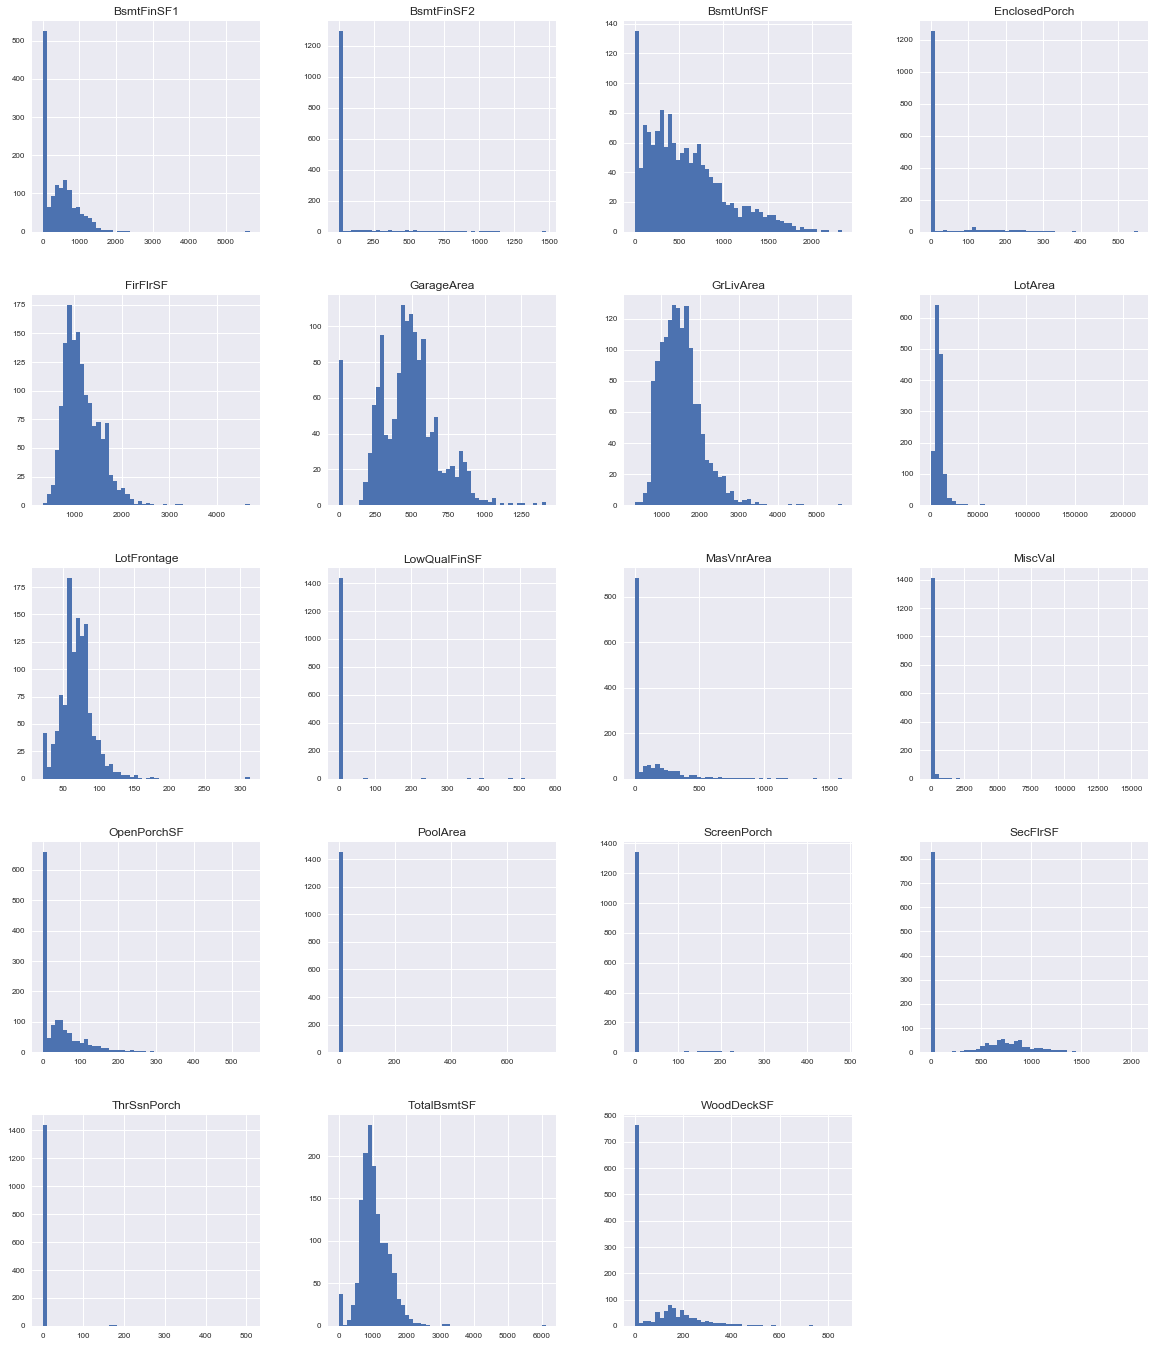

In [933]:
df[continous_col].hist(figsize=(20, 24), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

B-1-1) continous_col 의 kde

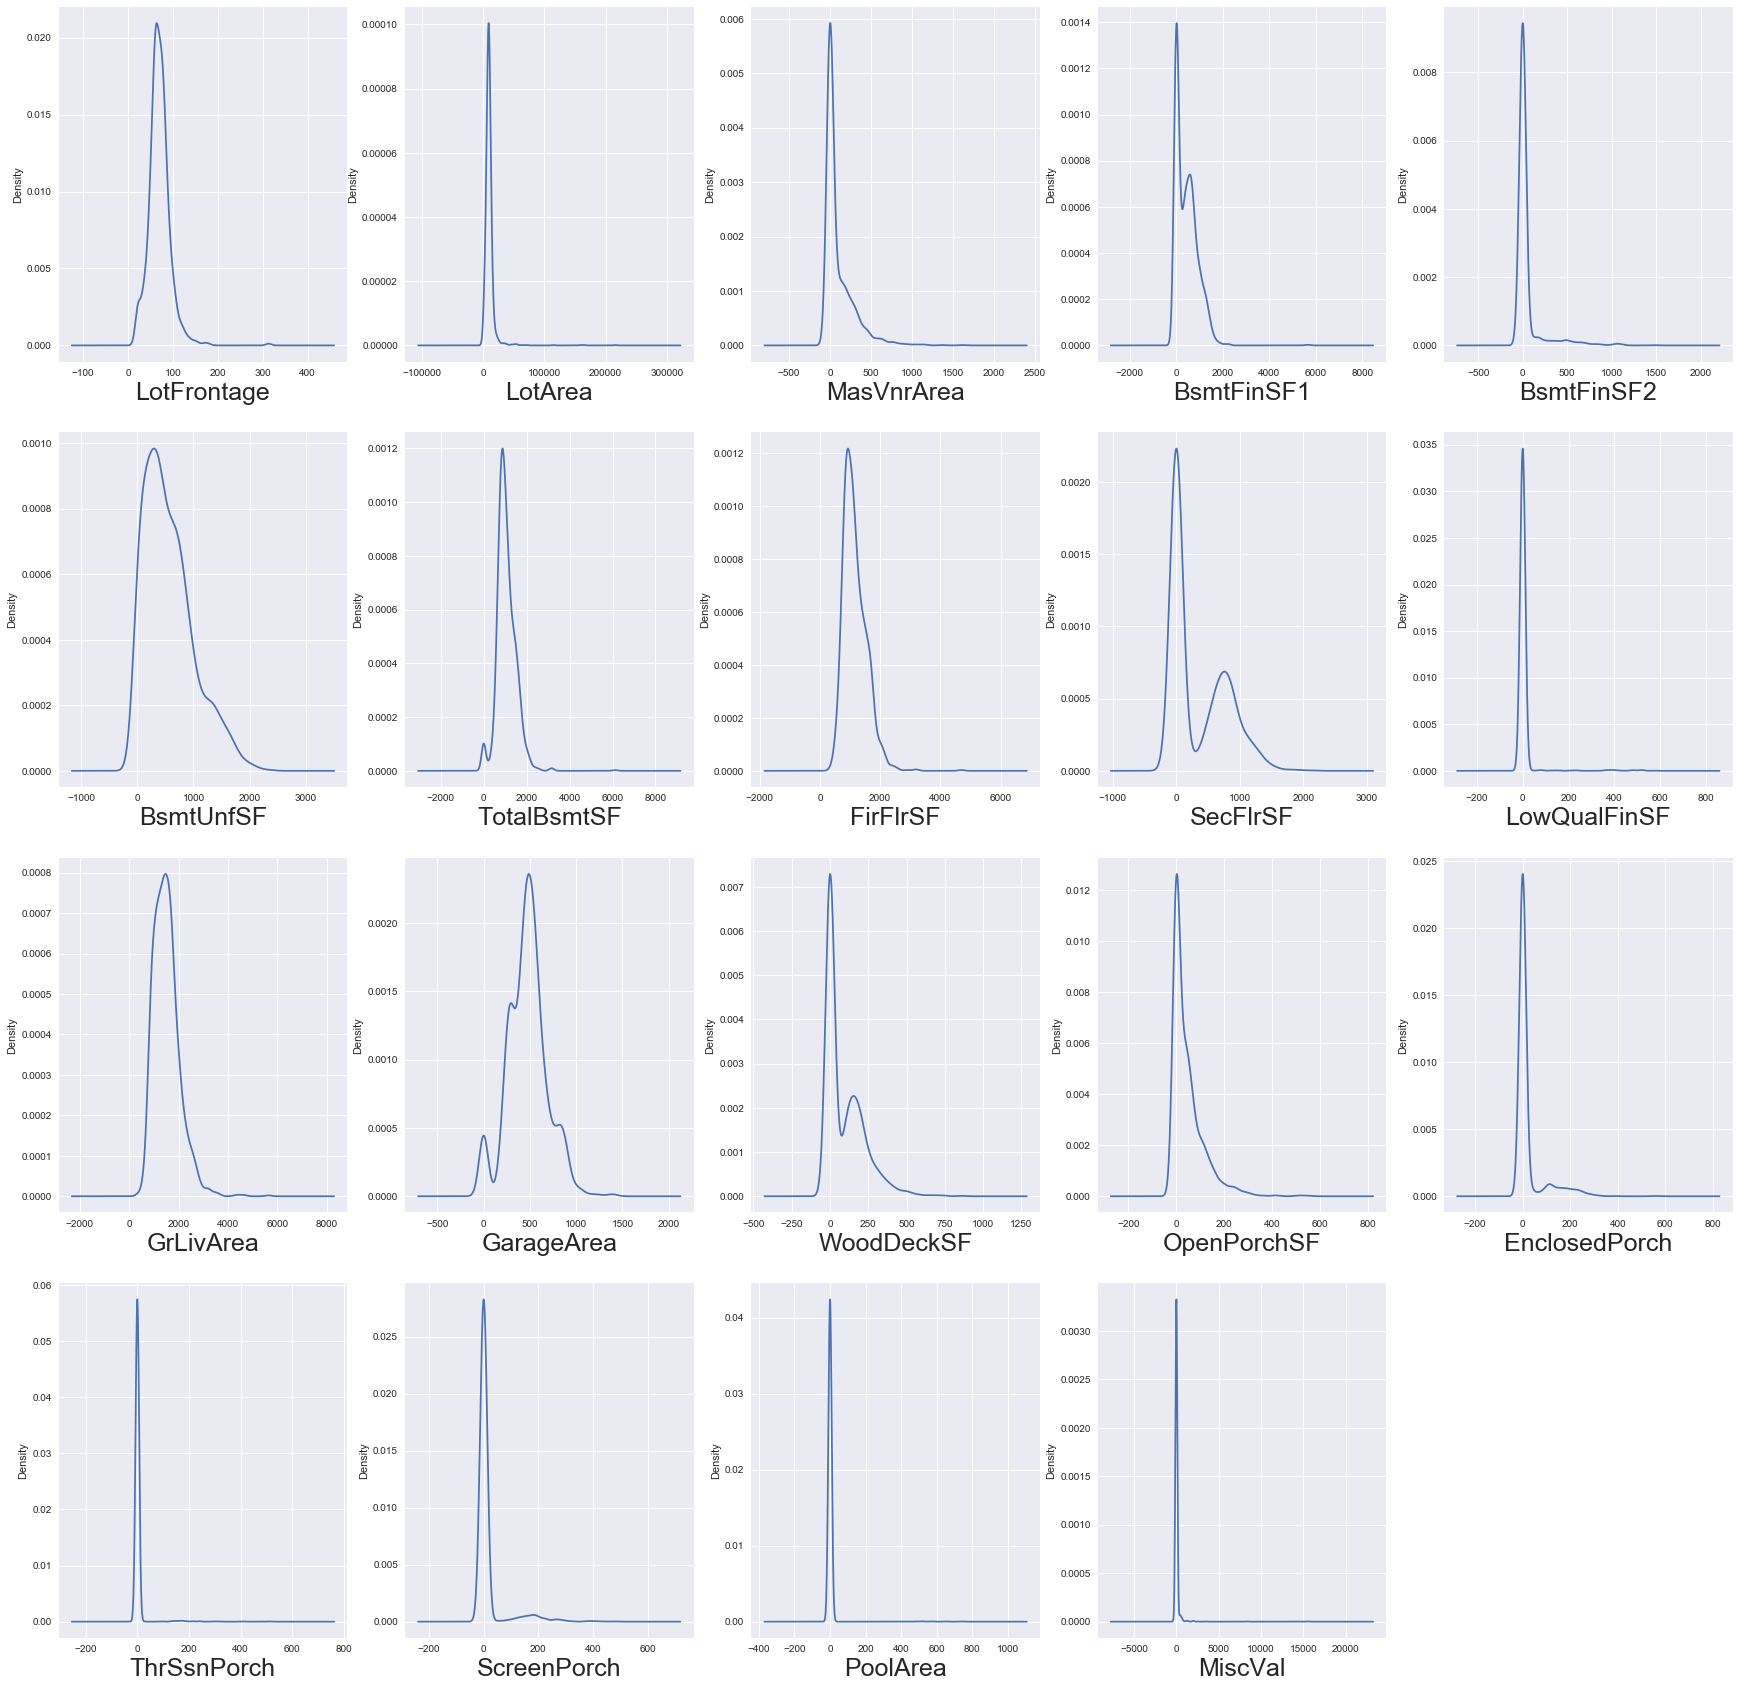

In [950]:
numb = 1
plt.figure(figsize= (30,30))
for c in continous_col:
    plt.subplot(4,5,numb)
    
    df[c].plot.kde()
    plt.xlabel(c, {
      'fontsize' : 25,
      })
    numb += 1 
plt.show()

B-1-2) discrete_col 의 분포
타이틀 사이즈 키우기

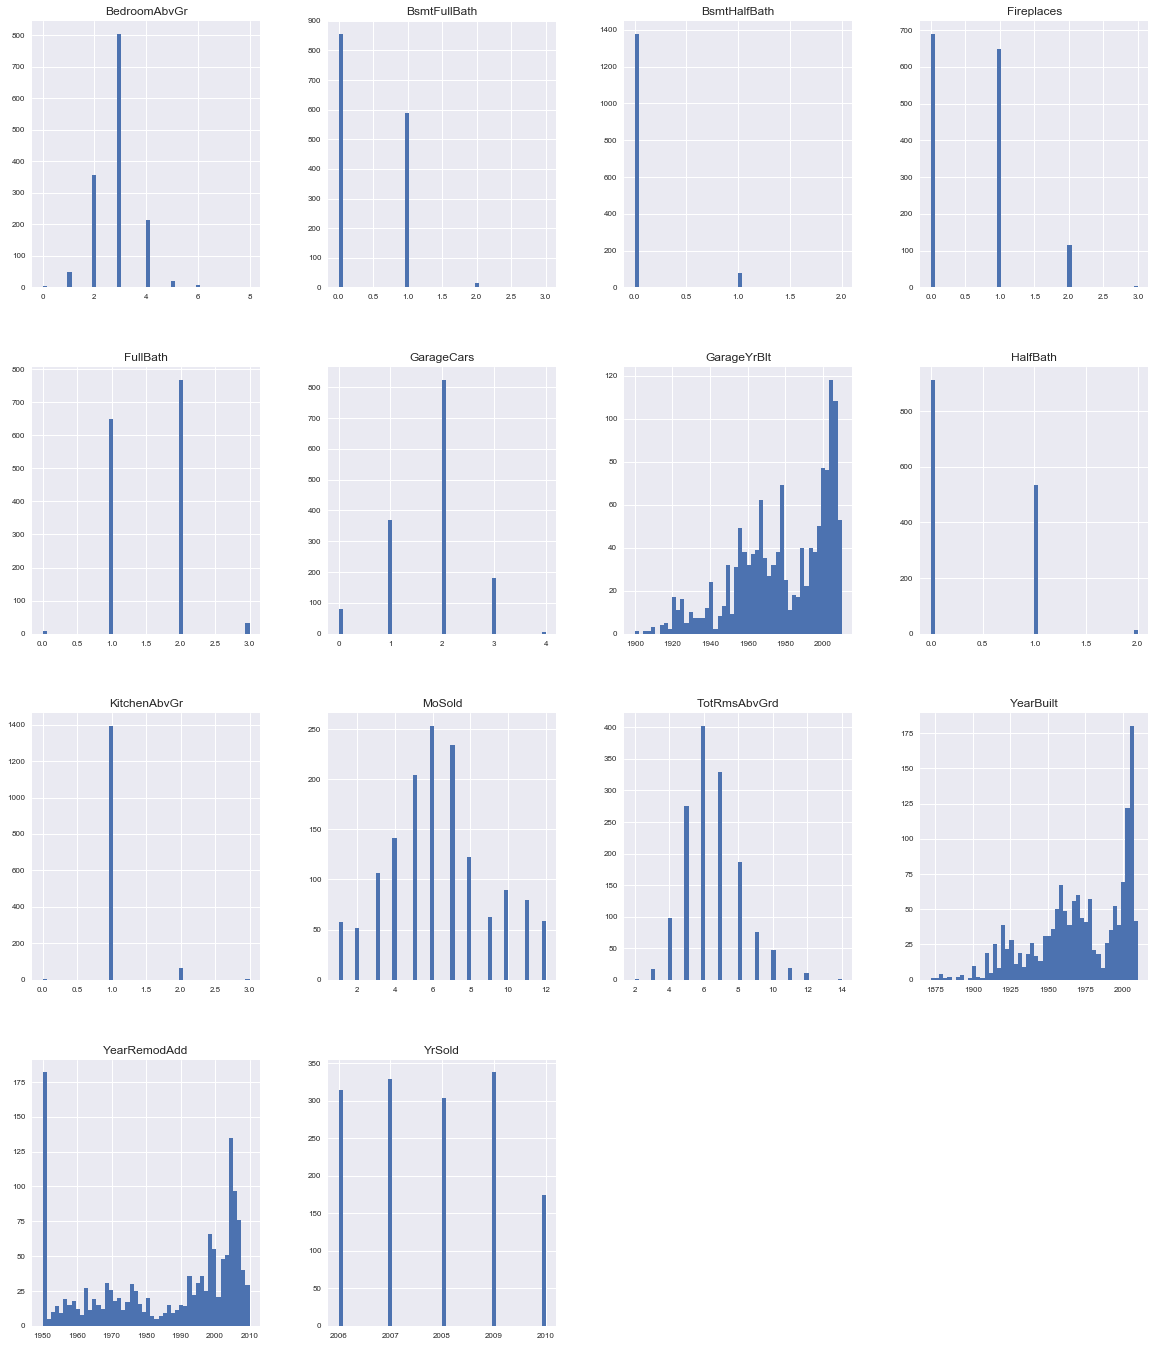

In [945]:
df[discrete_col].hist(figsize=(20, 24), bins=50, xlabelsize=8,\
                      ylabelsize=8,)
plt.show()

B-1-2) discrete_col kde 그래프

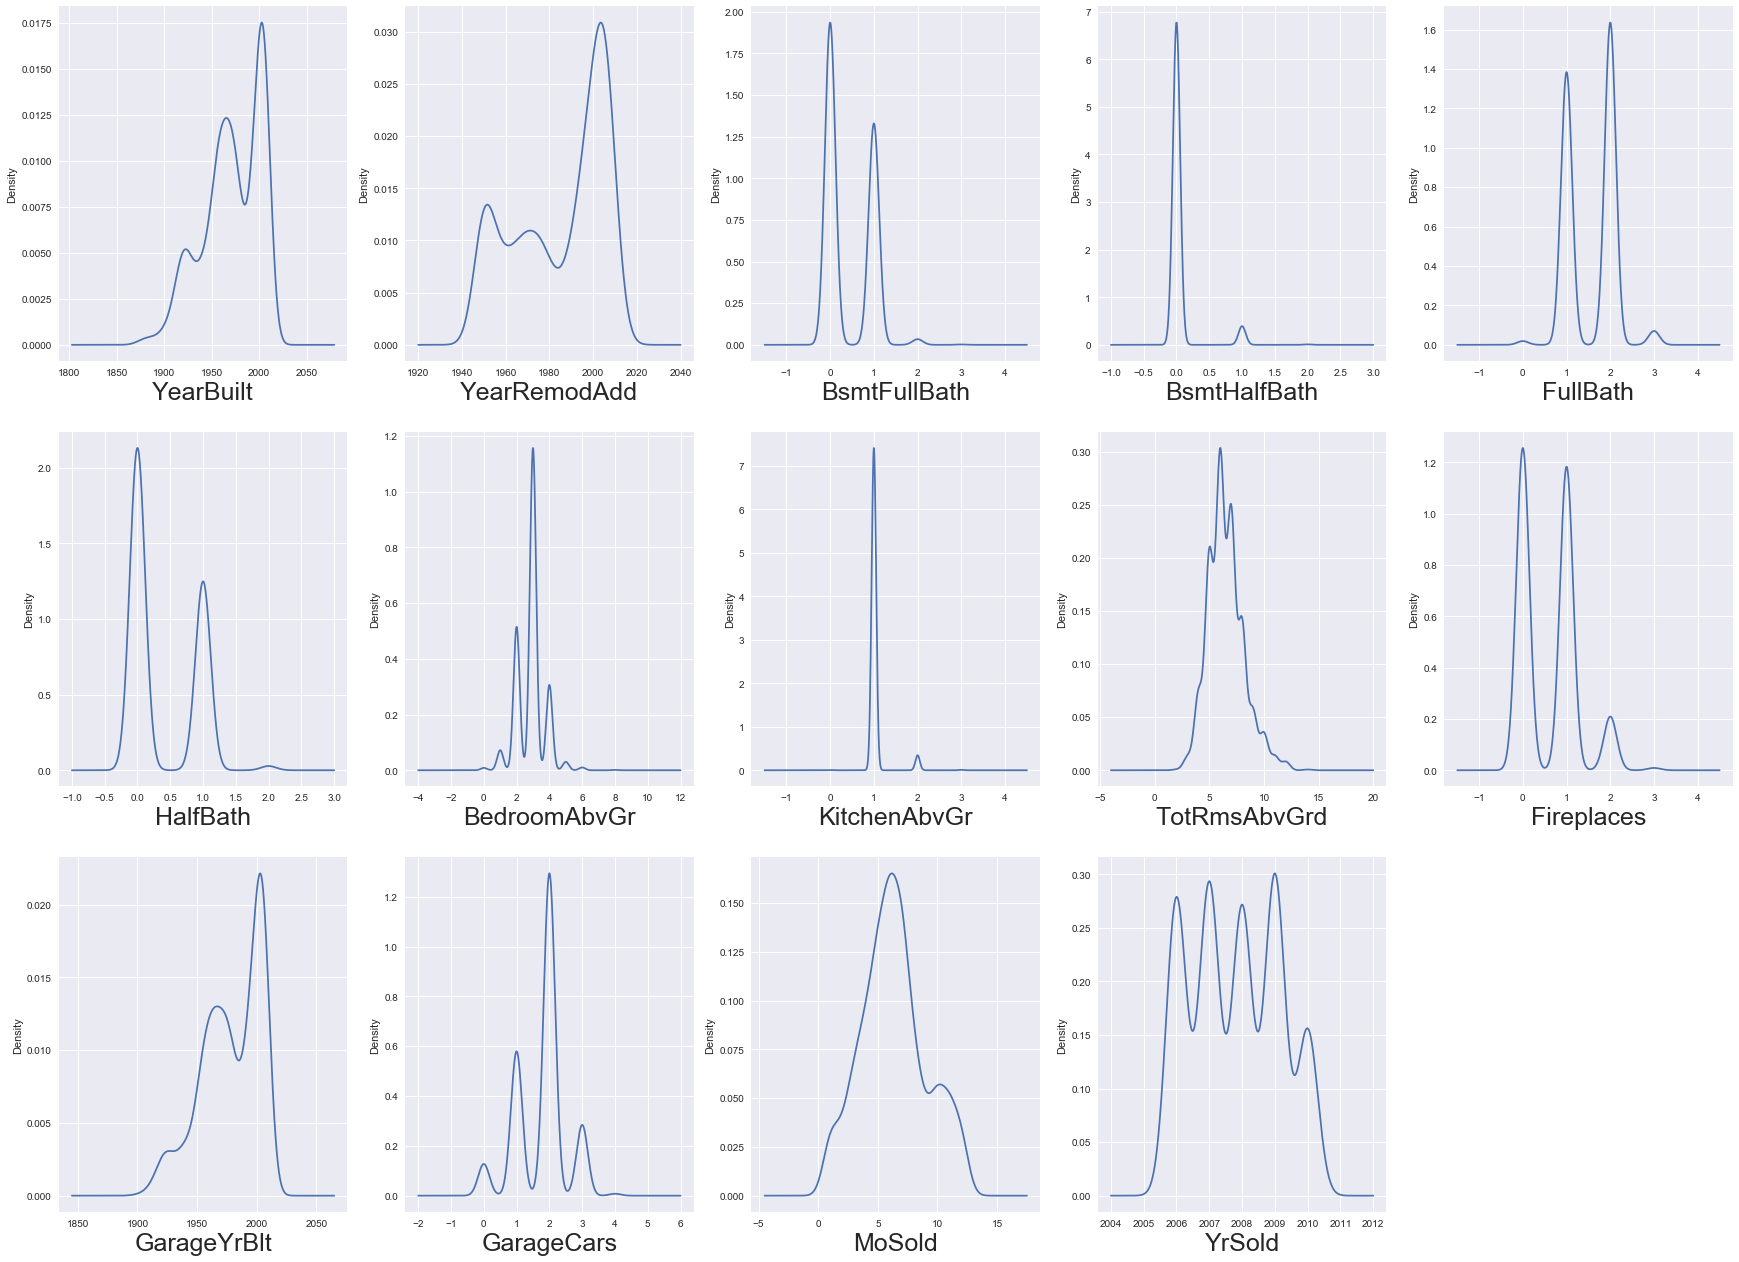

In [946]:
numb = 1
plt.figure(figsize= (30,30))
for c in discrete_col:
    plt.subplot(4,5,numb)
    
    df[c].plot.kde()
    plt.xlabel(c, {
      'fontsize' : 25,
      })
    numb += 1 

plt.show()

B-1-3) Nominal_col 데이터 분포 : 46개

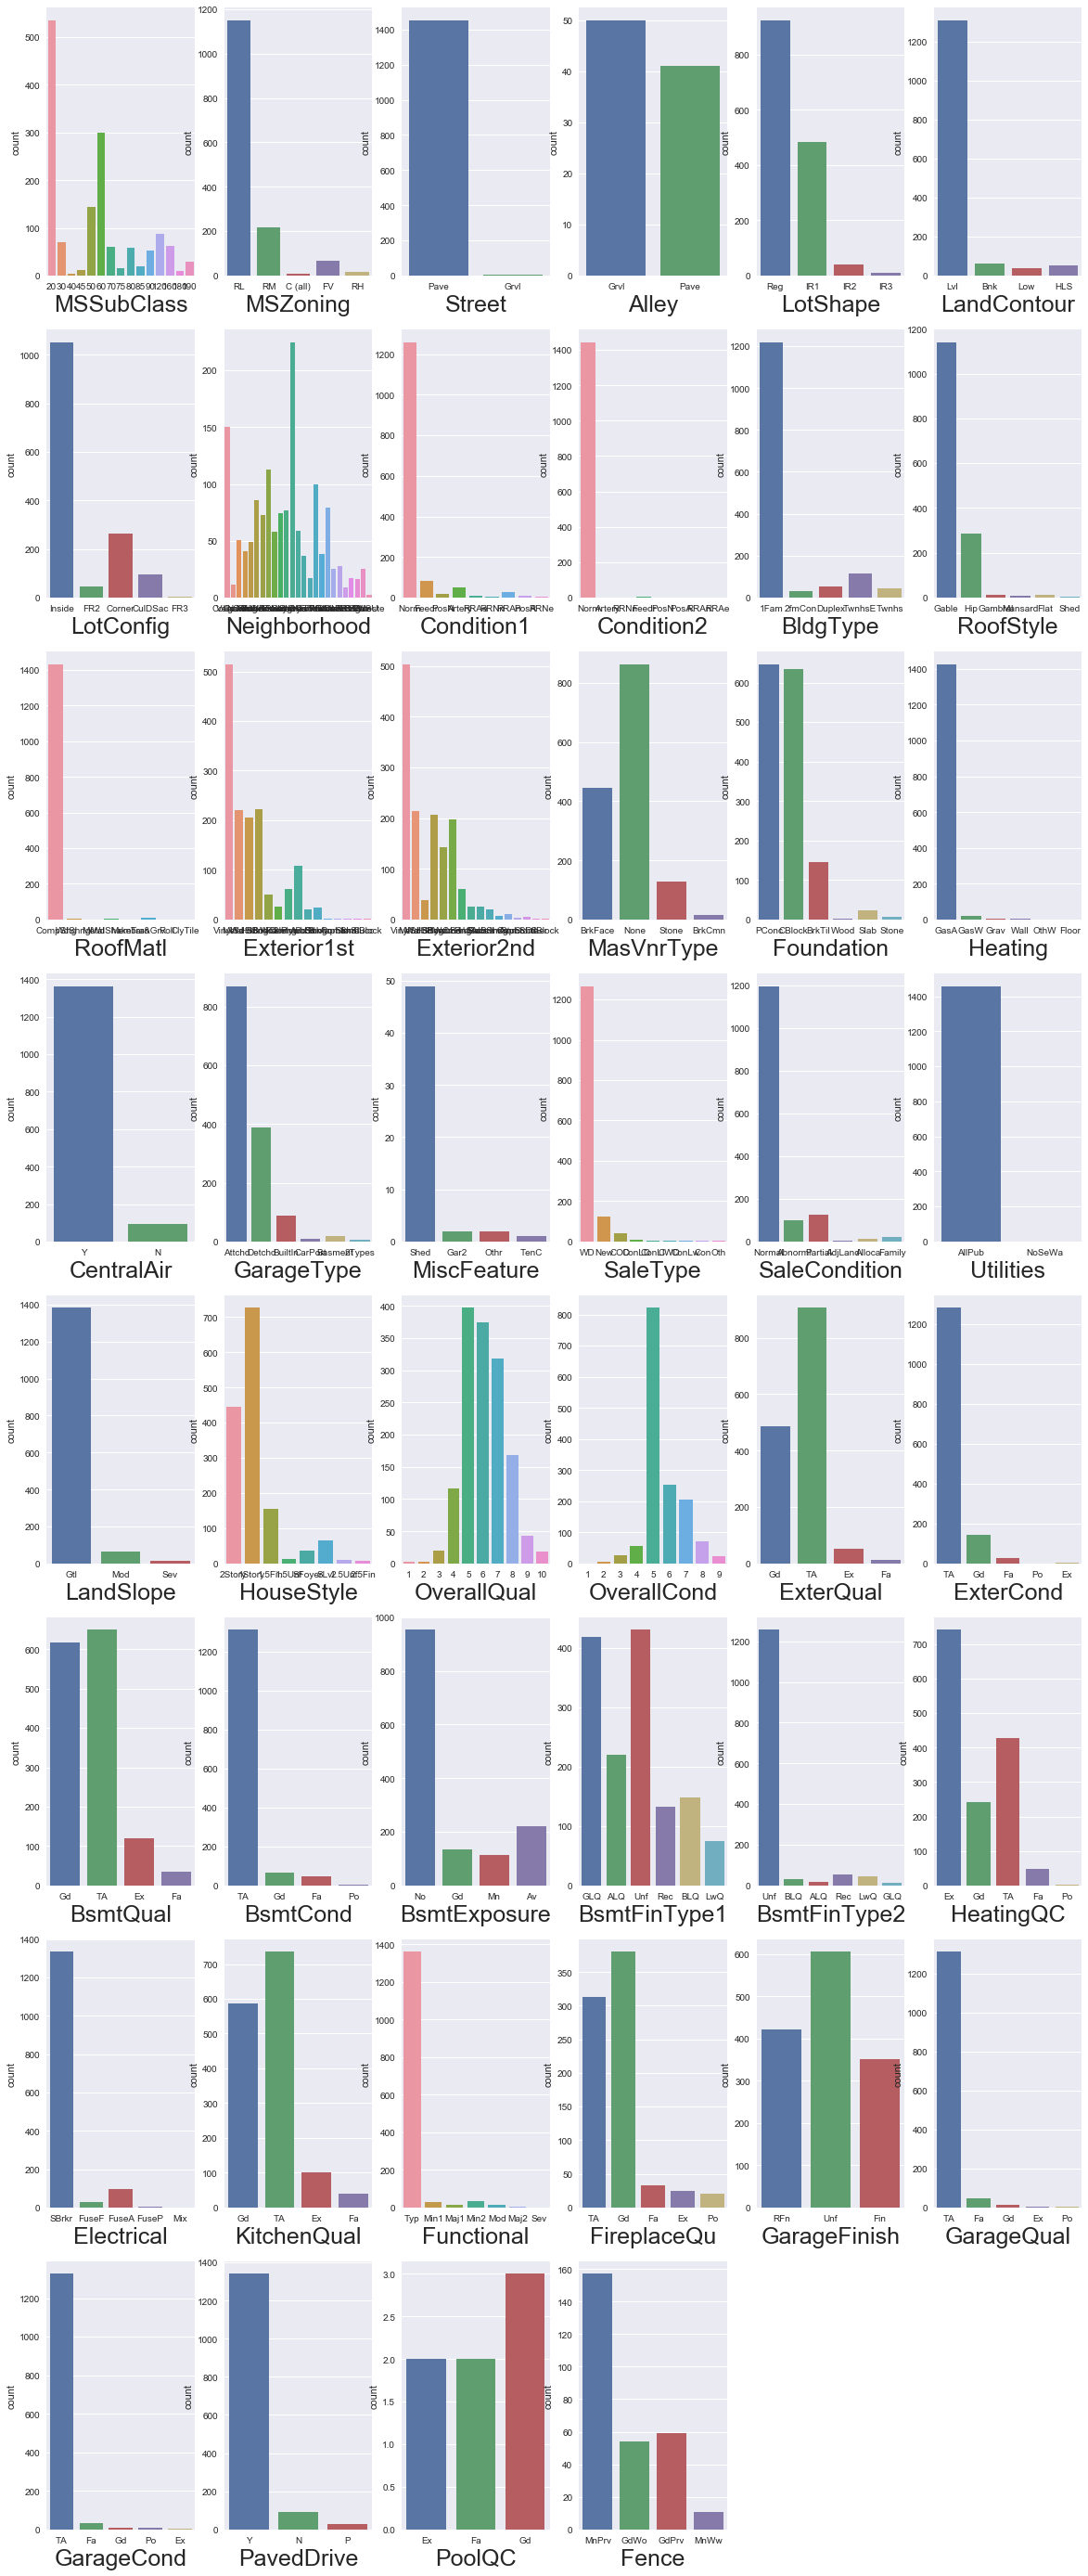

In [954]:
numb = 1
qualitative_col = nominal_col + ordinal_col
plt.figure(figsize= (20,50))
for col in qualitative_col:
    plt.subplot(8,6,numb)
    
    sns.countplot(x= col, data = df)
    plt.xlabel(col, {'fontsize':25})
    numb += 1    

plt.show()

#### B-2. 이변수 관계 분석
- 변수 2개 간의 관계를 분석
- 변수의 유형에 따라 적절한 시각화 및 분석 방법을 선택
- SalePrice ~ 연속형 변수
- SalePrice ~ 범주형 변수


B-2-1) SalePrice ~ 연속형 변수

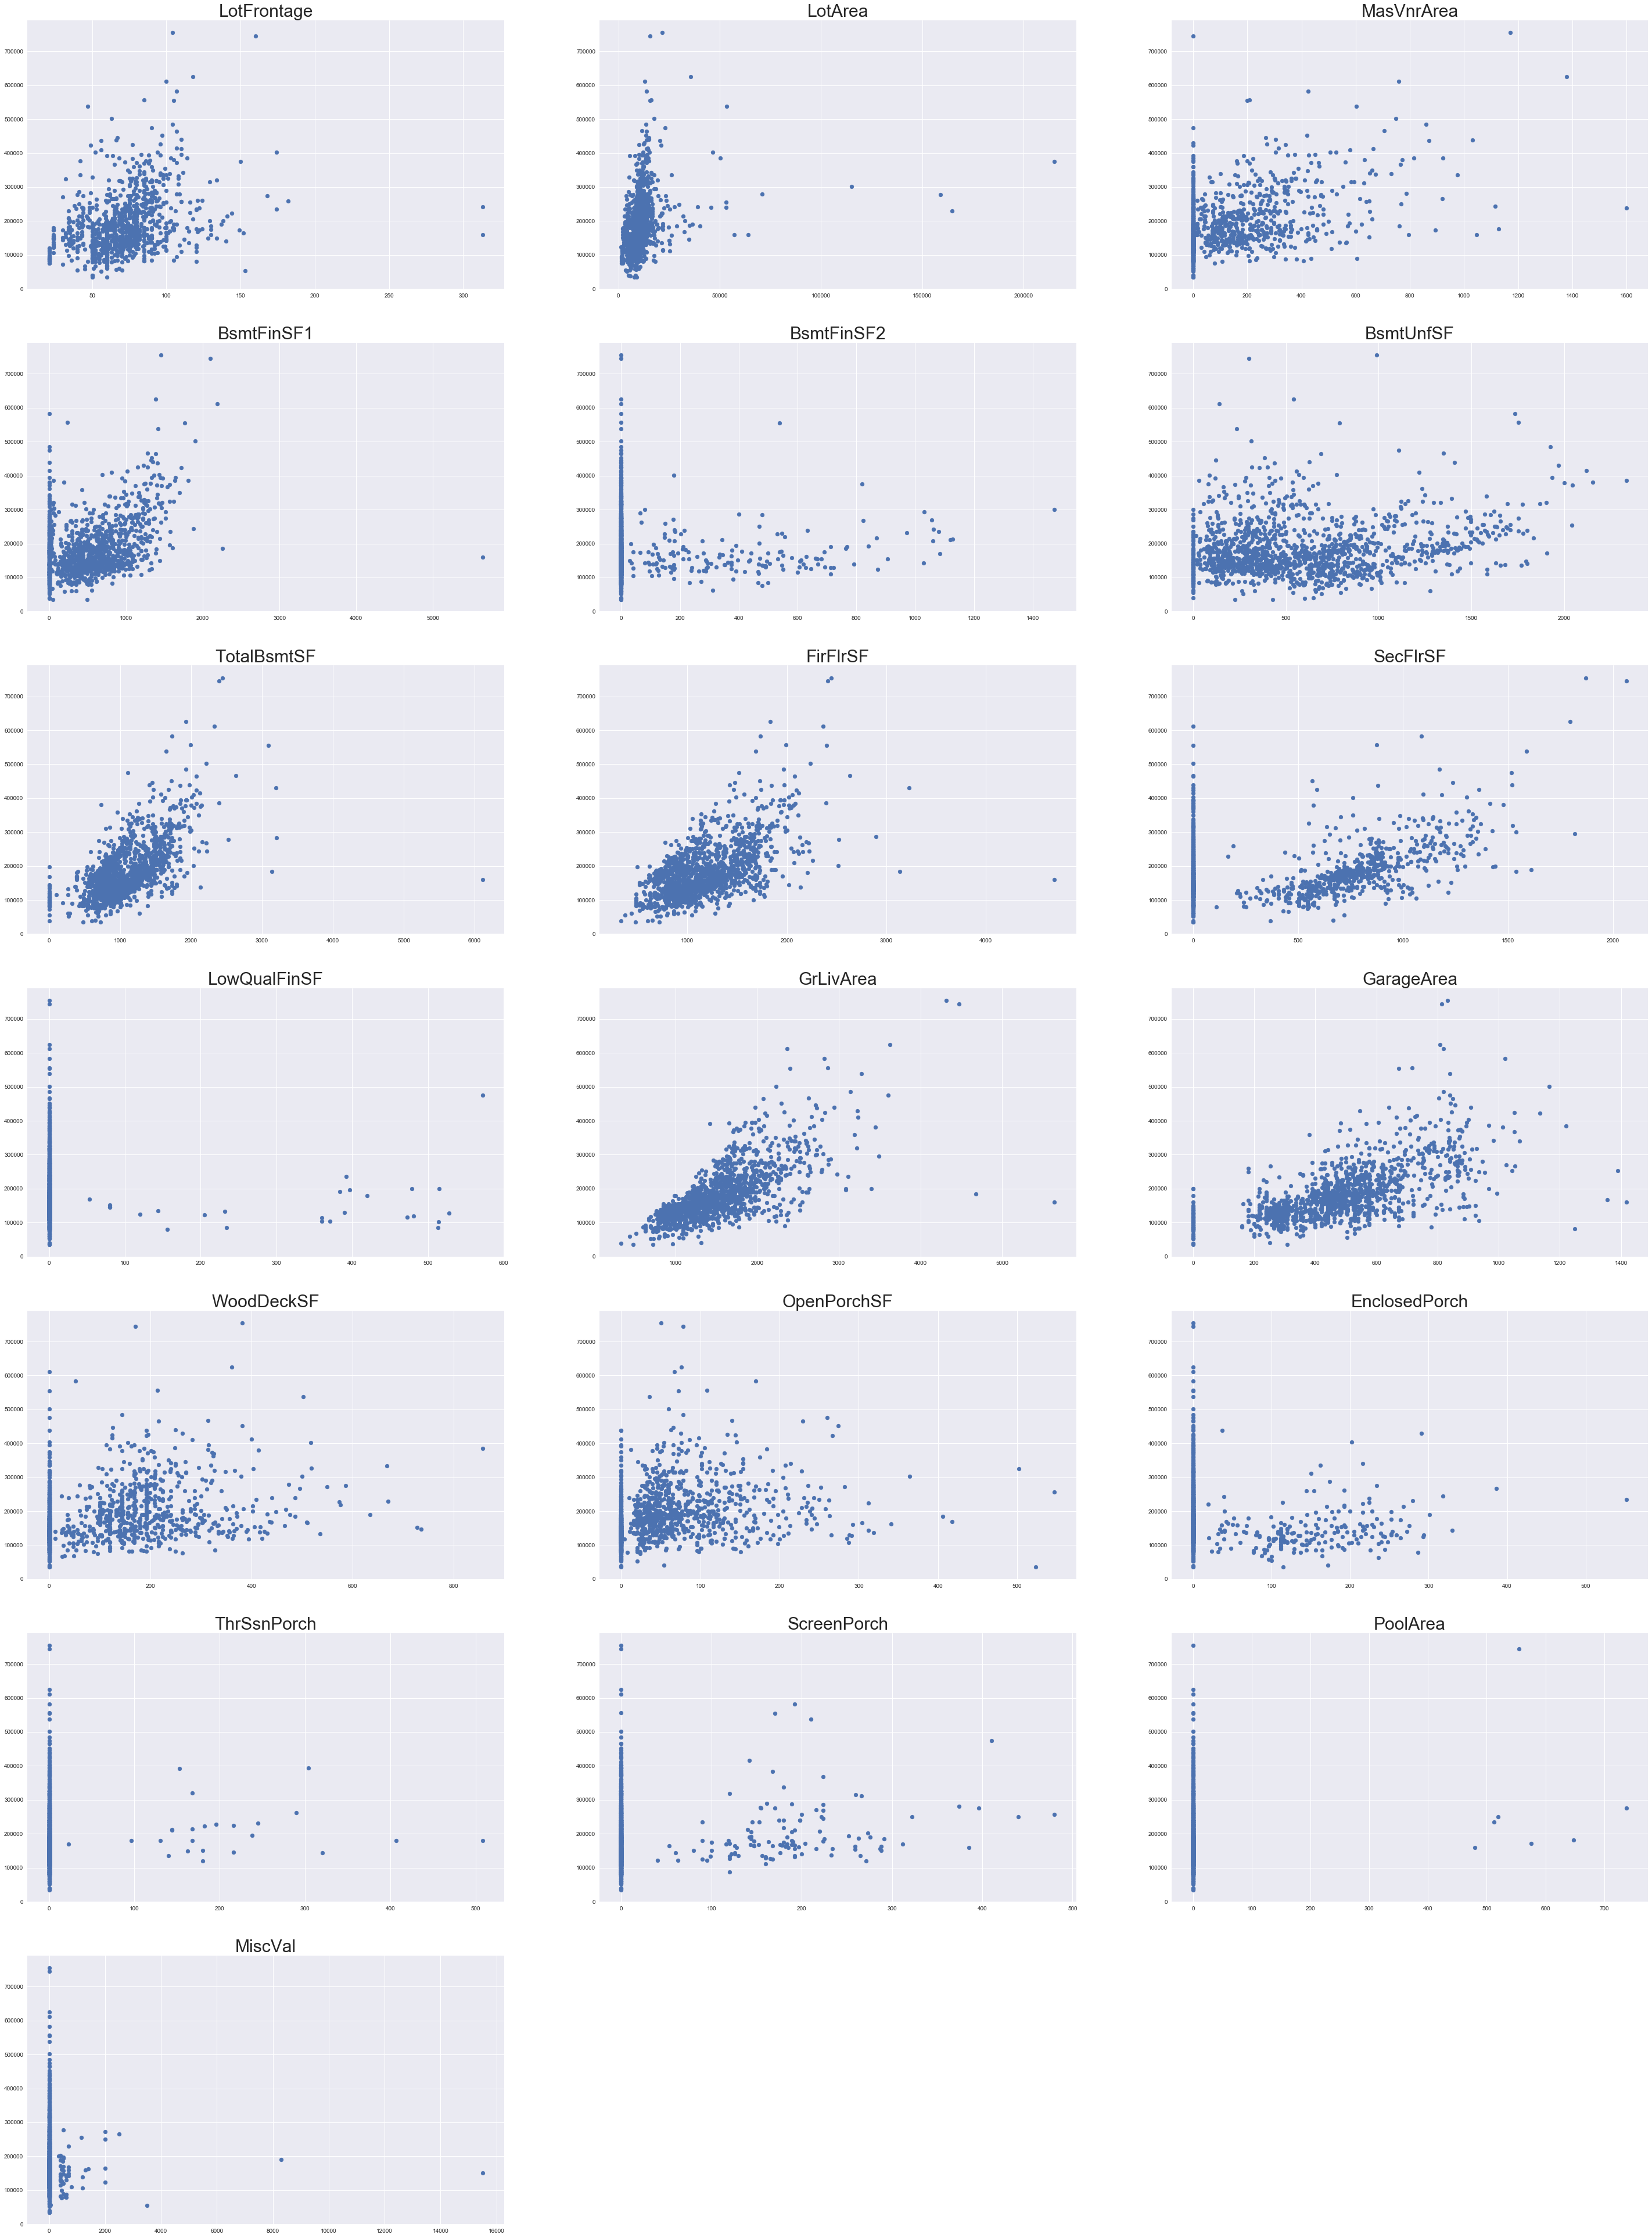

In [959]:
num = 1
plt.figure(figsize = (50,80))
for col in continous_col :
    plt.subplot(8,3,num)
    plt.scatter(df[col],df["SalePrice"])
    plt.title(col,{'fontsize': '30'})
    num += 1
    
plt.show()

B-2-2) SalePrice ~ 범주형 변수 - Boxplot

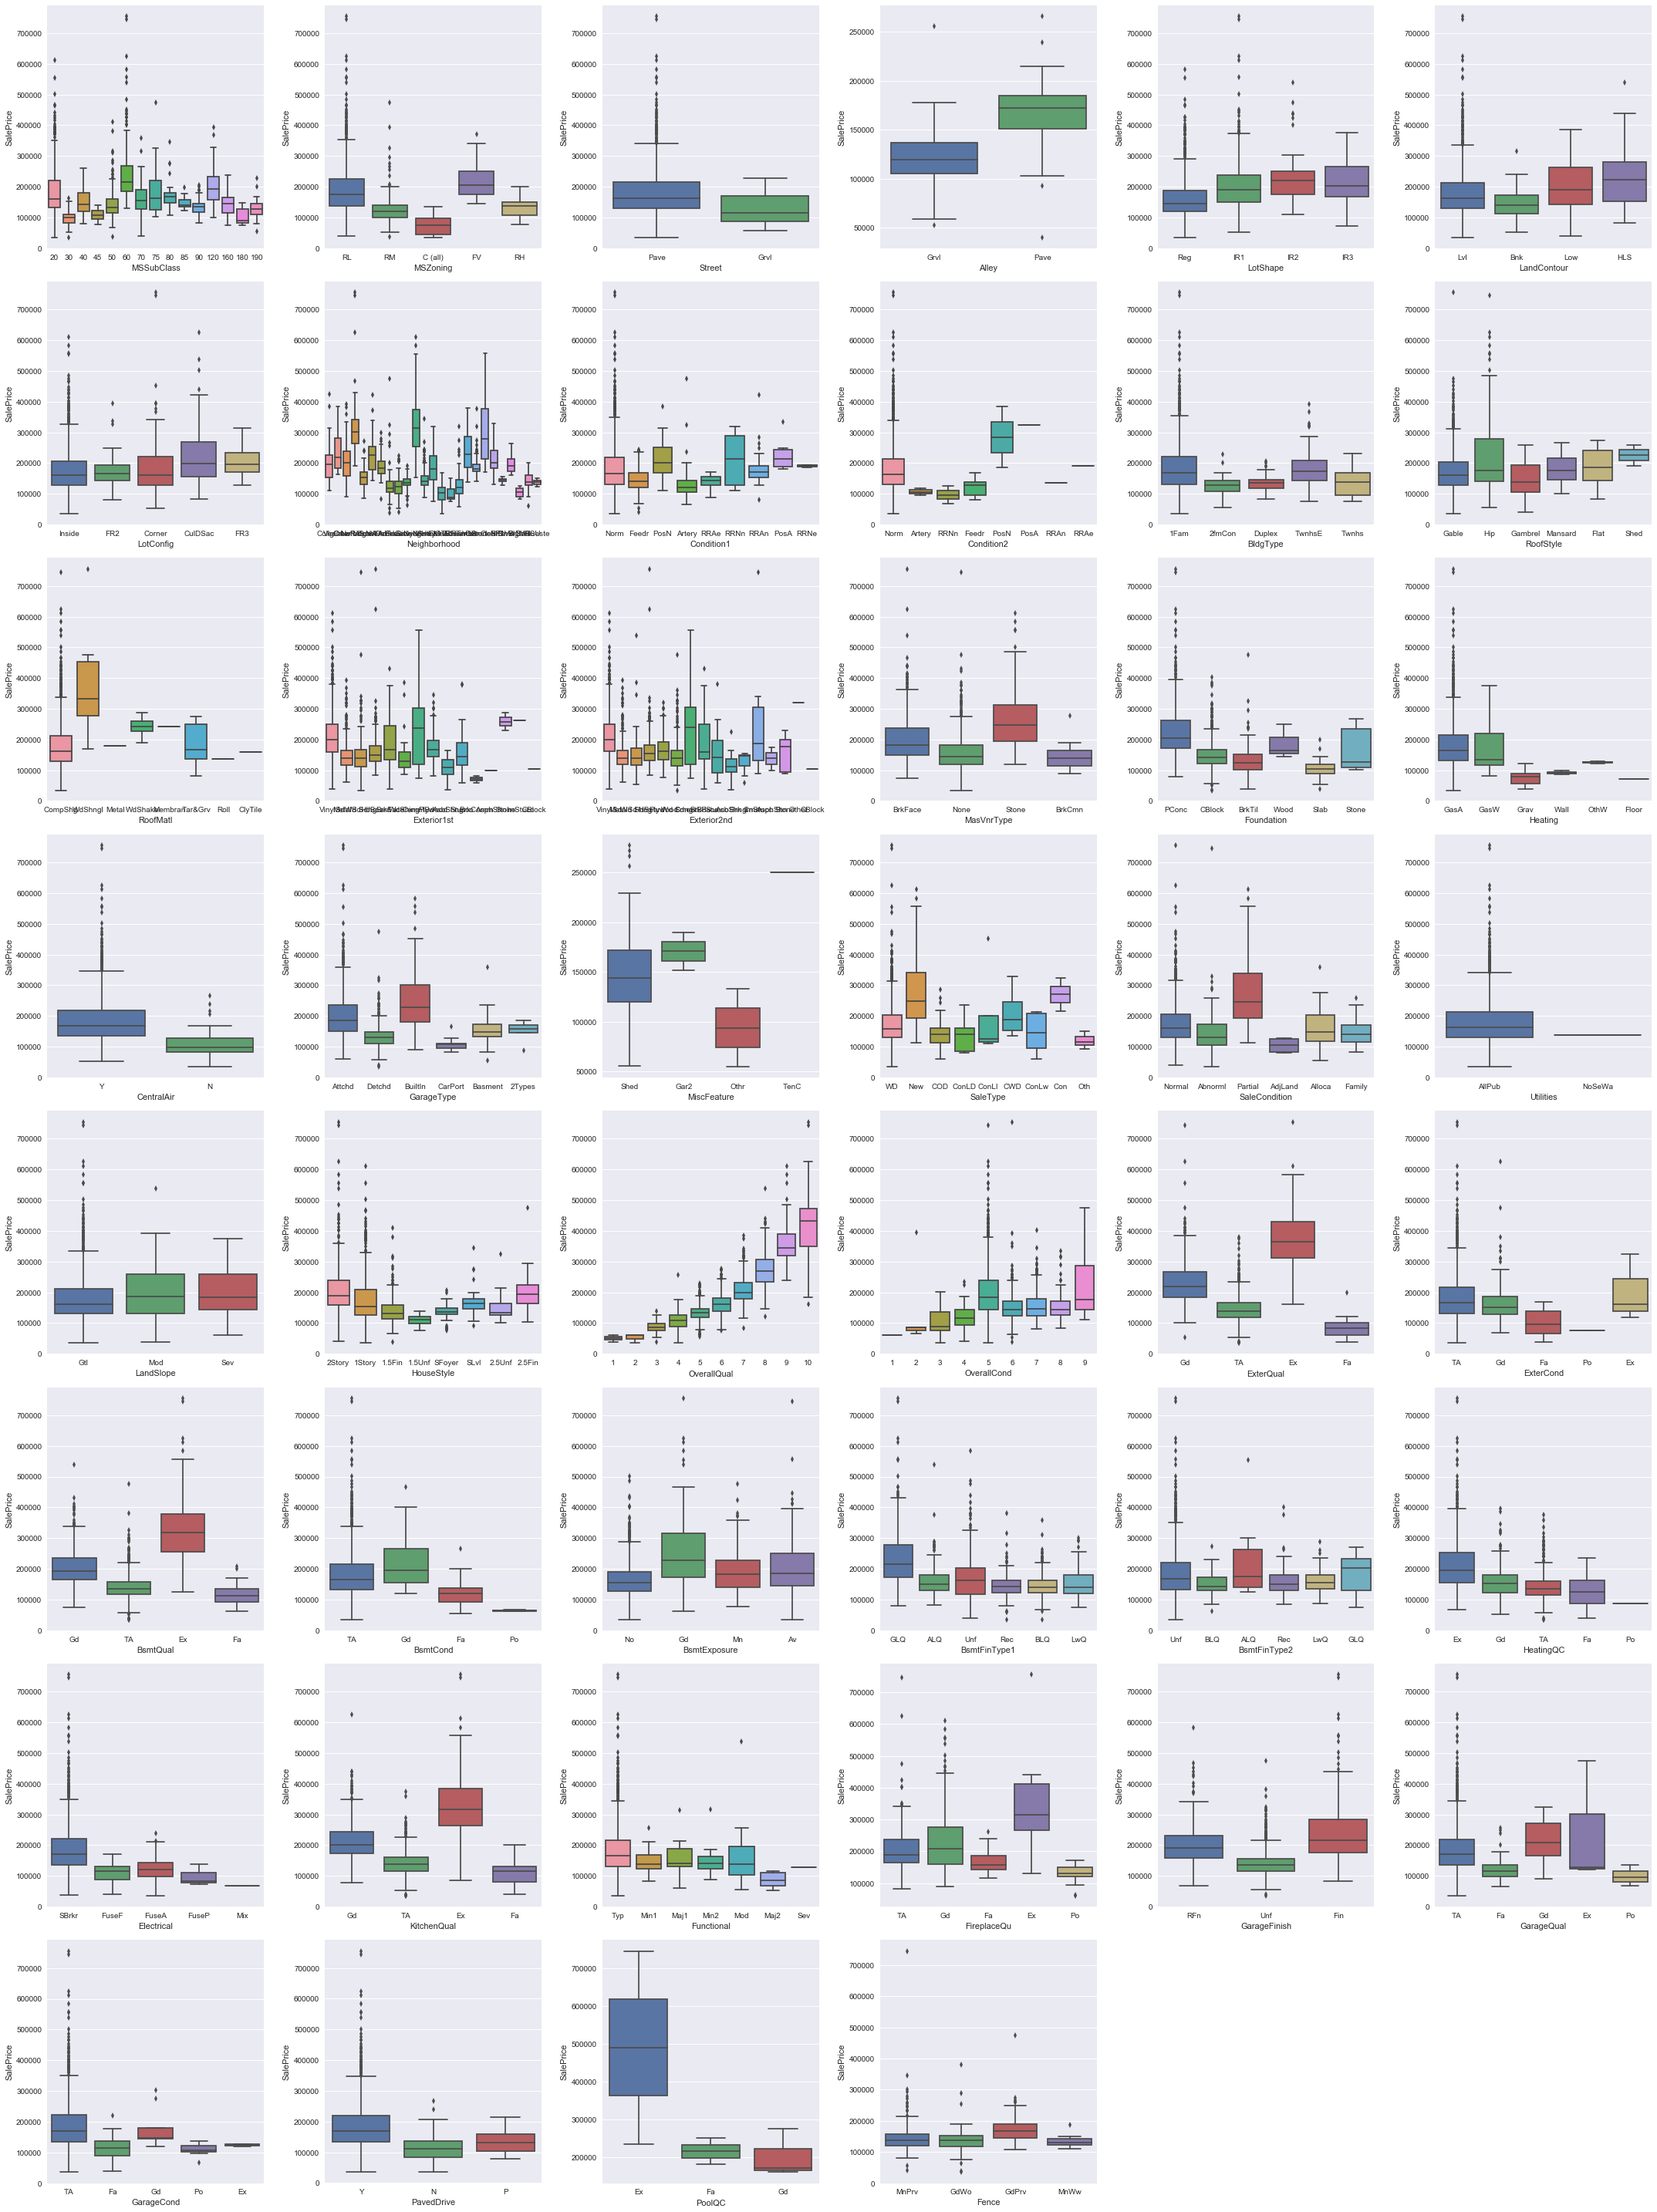

In [963]:
numb = 1
plt.figure(figsize= (30,40))
for col in qualitative_col:
    plt.subplot(8,6,numb)
    
    sns.boxplot(x= df[col], y = df["SalePrice"], data = df)
    numb += 1 

plt.tight_layout()
plt.show()

B-2-2) SalePrice ~ 범주형 변수 - Violin plot

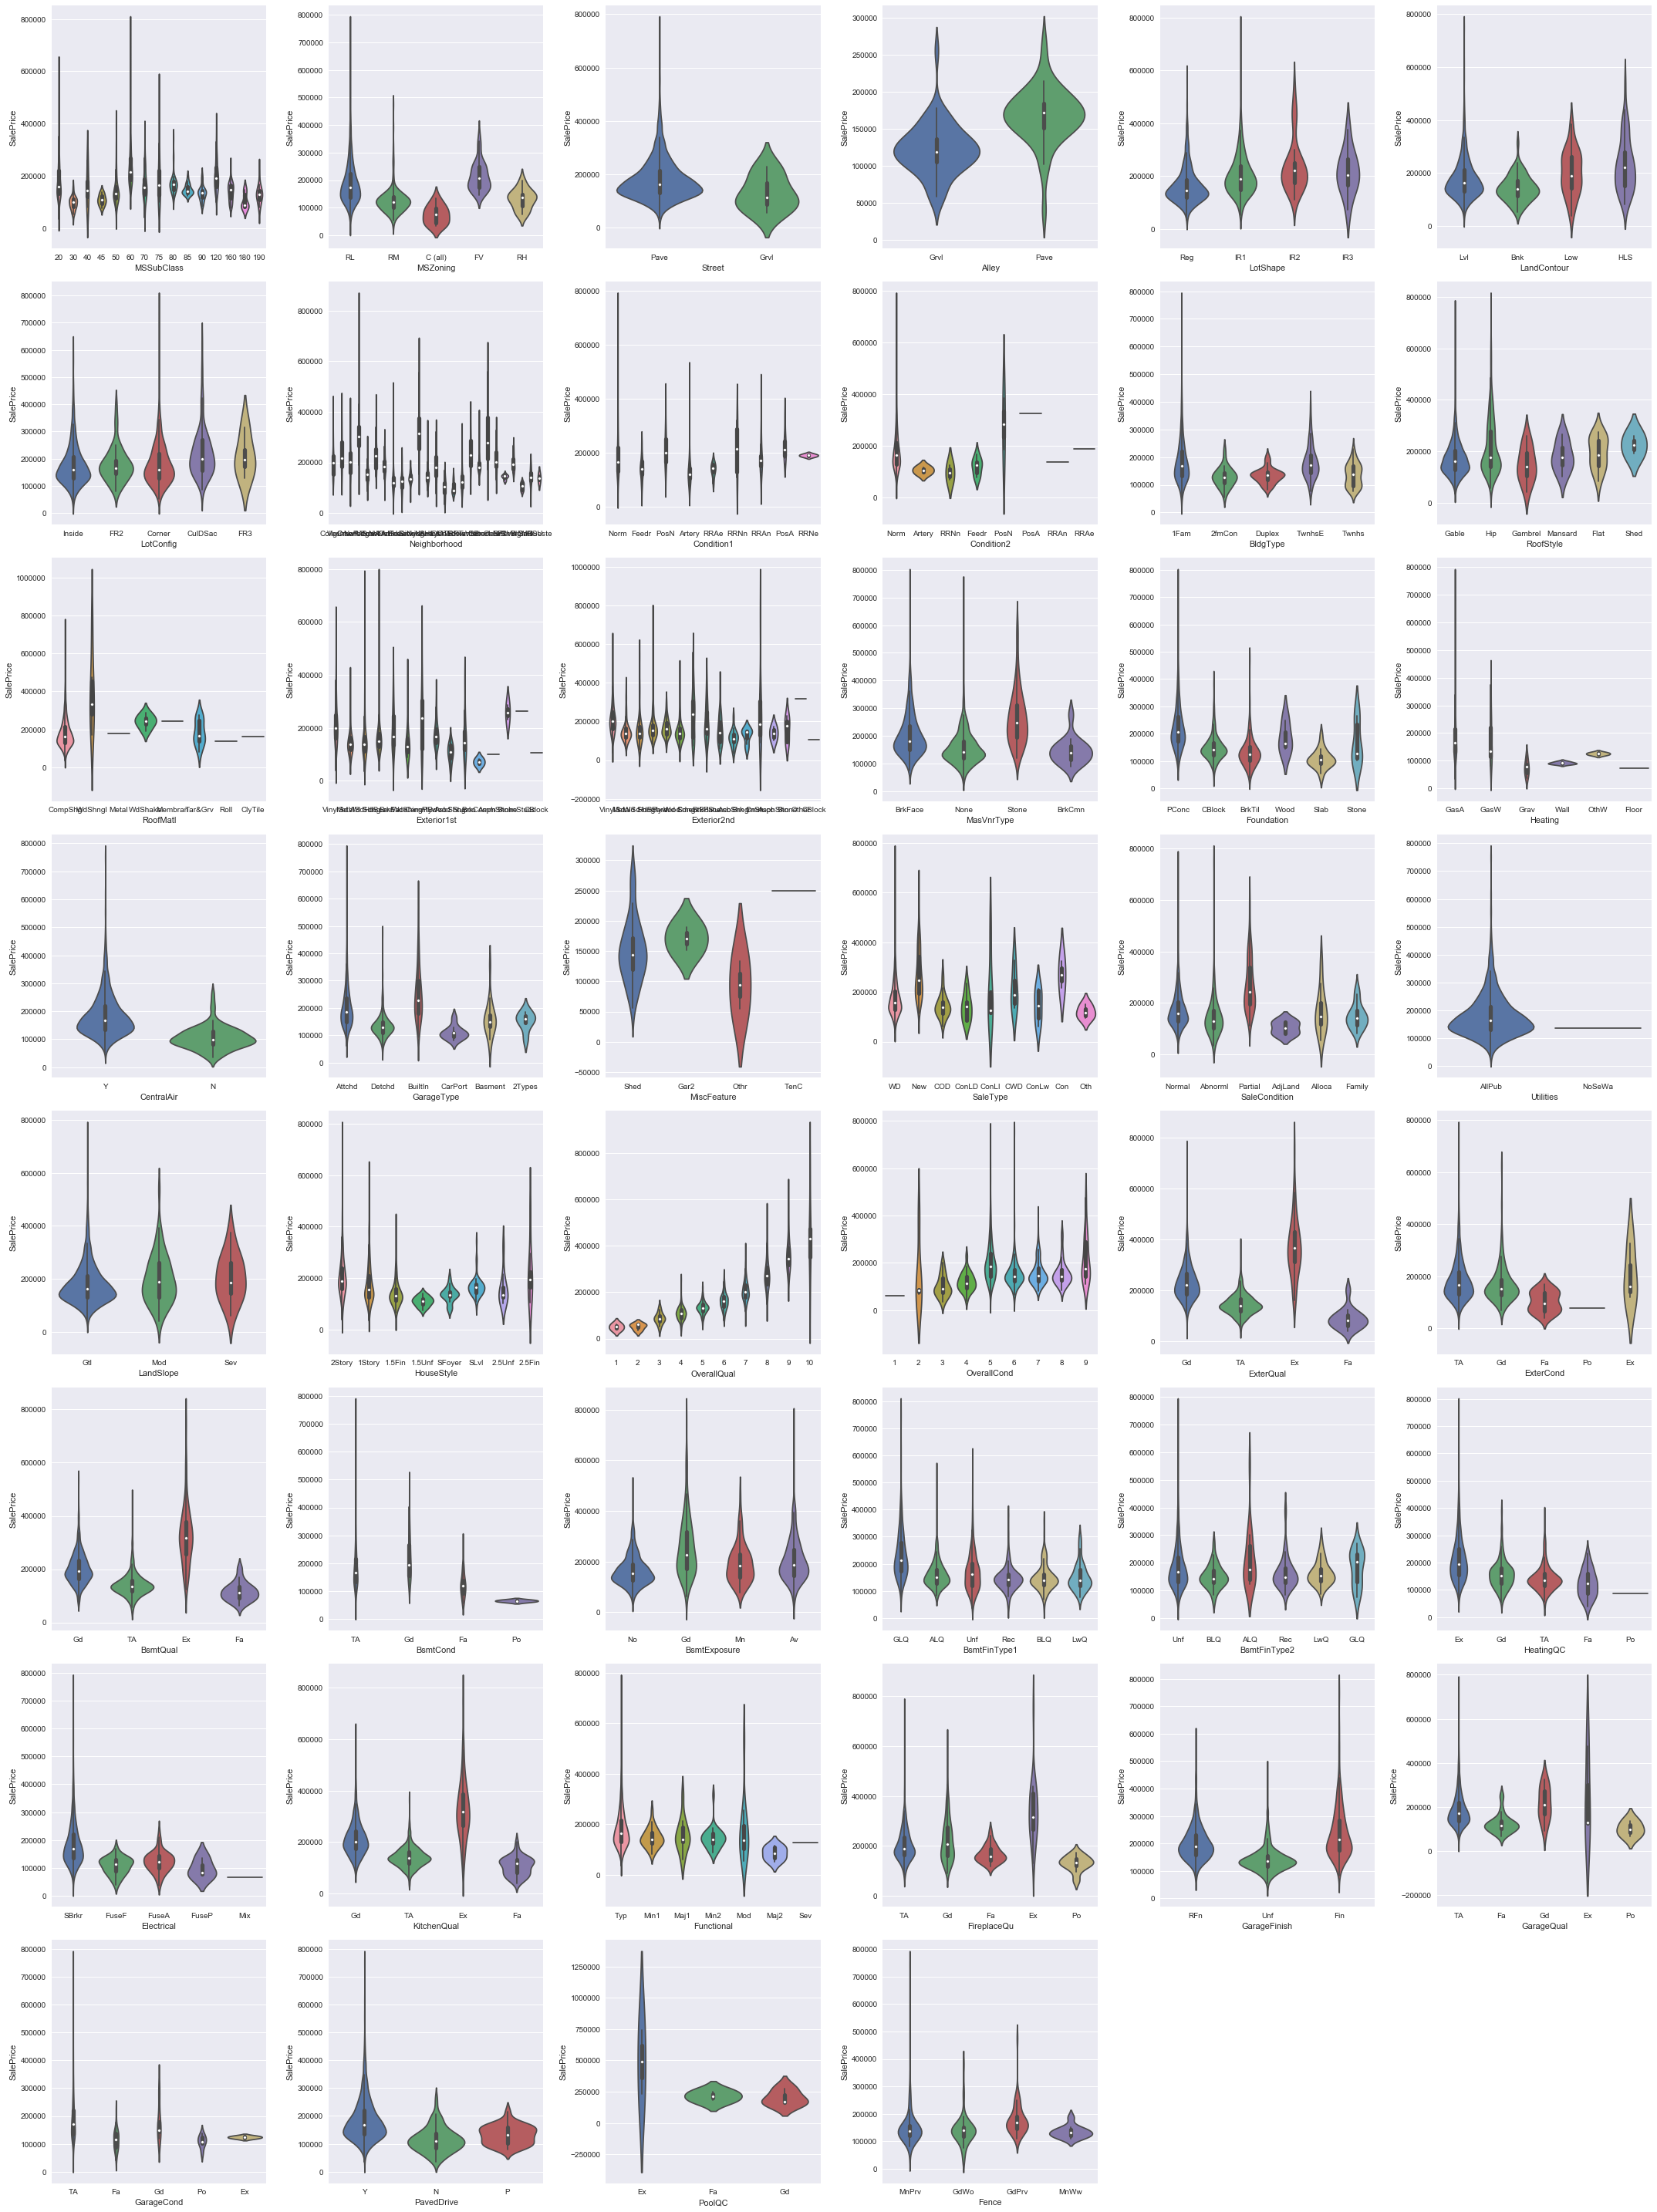

In [964]:
numb = 1
plt.figure(figsize= (30,40))
for col in qualitative_col:
    plt.subplot(8,6,numb)
    
    sns.violinplot(x= df[col], y = df["SalePrice"], data = df, split = True)
    numb += 1 
   
plt.tight_layout()
plt.show()

B-2-3) 변수간 상관관계 분석

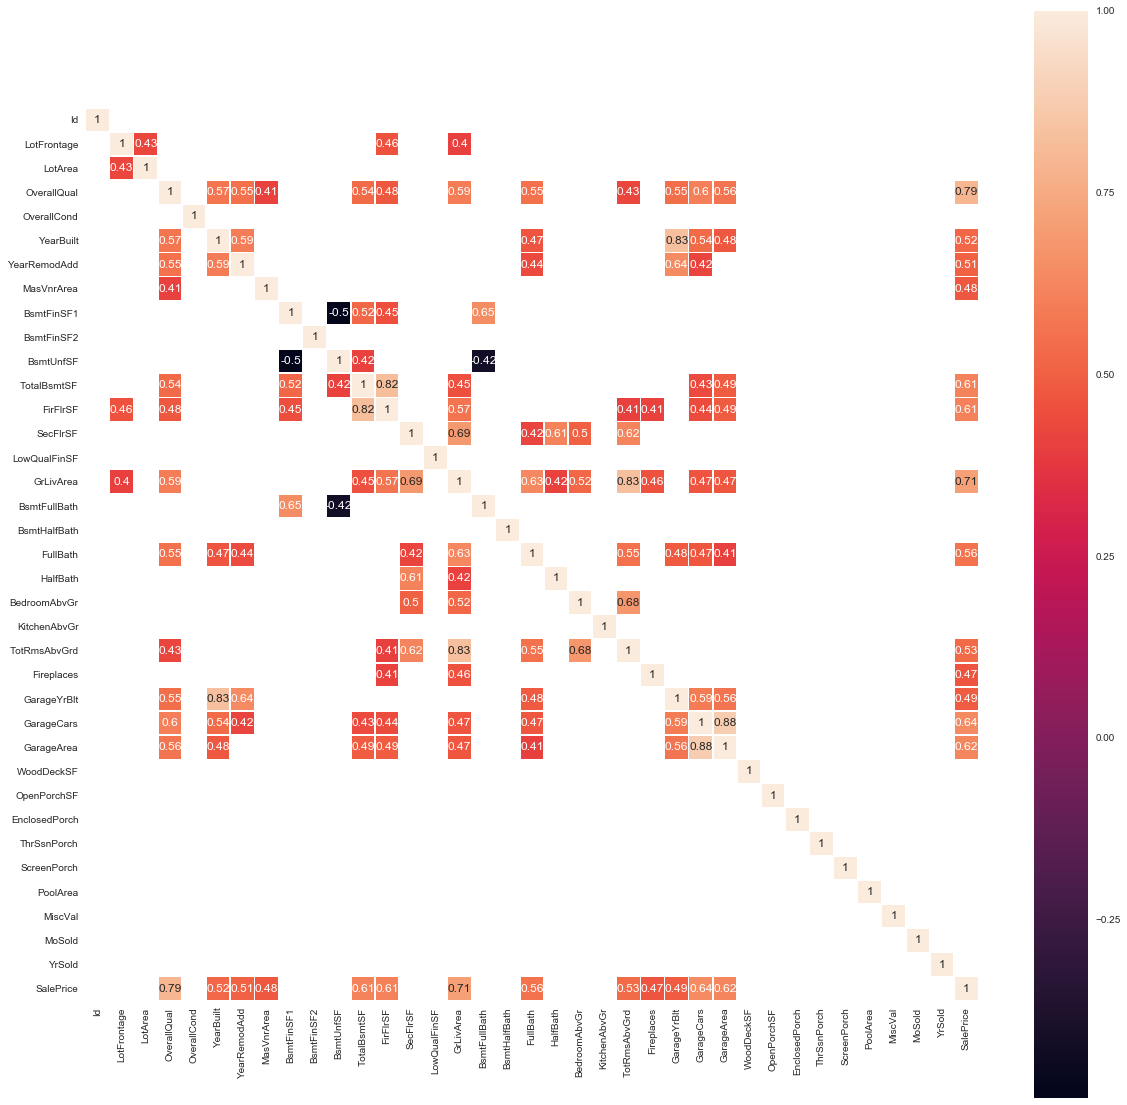

In [968]:
re = df.corr(method='pearson')

with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(20,20))
    ax = sns.heatmap(re[(abs(re)>=0.4)], square=True, annot=True, linewidths=0.5)
plt.show()

## 2. 결측값 처리 (Missing value treatment)

In [969]:
def find_missing_values(df):
    try:

        missing = df.isnull().sum()
        missing = missing[missing >0]

        missing.sort_values(inplace = True)
        print(missing)

        missing.plot(kind = 'bar')
        plt.show()
        
    except:
        print("No missing values")
        
def missing_values_idx(df):
    
    missing = df.isnull().sum()
    missing = missing[missing >0]

    missing_col = missing.index

    for col in missing_col:
        missing_idx = df[col].isnull()
        missing_idx = missing_idx[missing_idx].index
        print(missing_idx, col)
        print("\\")
                        

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


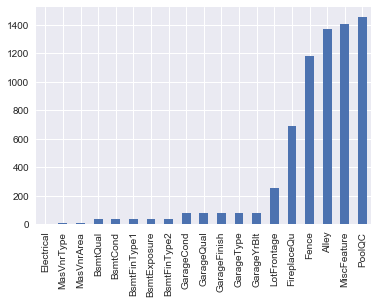

In [1277]:
find_missing_values(df)

TotalBsmtSF        1
GarageArea         1
GarageCars         1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
SaleType           1
Exterior1st        1
Exterior2nd        1
Functional         2
Utilities          2
BsmtHalfBath       2
BsmtFullBath       2
MSZoning           4
MasVnrArea        15
MasVnrType        16
BsmtFinType2      42
BsmtFinType1      42
BsmtQual          44
BsmtExposure      44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
GarageYrBlt       78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64


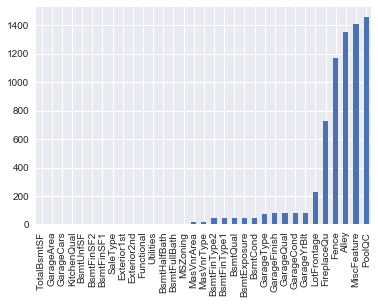

In [1278]:
find_missing_values(df_test)

In [1279]:
df["BsmtQual"].fillna(value = "NoBsmt", inplace = True)
df["BsmtCond"].fillna(value = "NoBsmt", inplace = True)
df["BsmtExposure"].fillna(value = "NoBsmt", inplace = True)
df["BsmtFinType1"].fillna(value = "NoBsmt", inplace = True)
df["BsmtFinType2"].fillna(value = "NoBsmt", inplace = True)

df["Electrical"].fillna(value = "None", inplace = True)
df["FireplaceQu"].fillna(value = "NoFirePlace", inplace = True)

df["GarageType"].fillna(value = "NoGarage", inplace = True)
df["GarageFinish"].fillna(value = "NoGarage", inplace = True)
df["GarageYrBlt"].fillna(value = 0, inplace = True)
#GarageYrBlt를 범주화하여 카테고리 값으로 변경하자.
df["GarageQual"].fillna(value = "NoGarage", inplace = True)
df["GarageCond"].fillna(value = "NoGarage", inplace = True)

df["PoolQC"].fillna(value = "NoPool", inplace = True)
df["MiscFeature"].fillna(value = "None", inplace = True)
df["Fence"].fillna(value = "None", inplace = True)

df["MasVnrType"].fillna(value = "None", inplace = True)
df["MasVnrArea"].fillna(value = 0.0, inplace = True)
df["Alley"].fillna(value = "None", inplace = True)

df["LotFrontage"].fillna(value = 0.0, inplace = True)

In [1280]:
df_test["BsmtQual"].fillna(value = "NoBsmt", inplace = True)
df_test["BsmtCond"].fillna(value = "NoBsmt", inplace = True)
df_test["BsmtExposure"].fillna(value = "NoBsmt", inplace = True)
df_test["BsmtFinType1"].fillna(value = "NoBsmt", inplace = True)
df_test["BsmtFinType2"].fillna(value = "NoBsmt", inplace = True)

df_test["Electrical"].fillna(value = "None", inplace = True)
df_test["FireplaceQu"].fillna(value = "NoFirePlace", inplace = True)

df_test["GarageType"].fillna(value = "NoGarage", inplace = True)
df_test["GarageFinish"].fillna(value = "NoGarage", inplace = True)
df_test["GarageYrBlt"].fillna(value = 0, inplace = True)
#GarageYrBlt를 범주화하여 카테고리 값으로 변경하자.
df_test["GarageQual"].fillna(value = "NoGarage", inplace = True)
df_test["GarageCond"].fillna(value = "NoGarage", inplace = True)

df_test["PoolQC"].fillna(value = "NoPool", inplace = True)
df_test["MiscFeature"].fillna(value = "None", inplace = True)
df_test["Fence"].fillna(value = "None", inplace = True)

df_test["MasVnrType"].fillna(value = "None", inplace = True)
df_test["MasVnrArea"].fillna(value = 0.0, inplace = True)
df_test["Alley"].fillna(value = "None", inplace = True)

df_test["LotFrontage"].fillna(value = 0.0, inplace = True)


Series([], dtype: int64)
No missing values
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
KitchenQual     1
GarageCars      1
GarageArea      1
SaleType        1
Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
MSZoning        4
dtype: int64


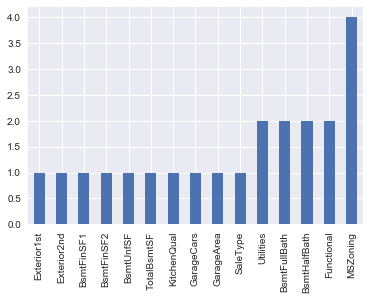

(None, None)

In [1281]:
find_missing_values(df), find_missing_values(df_test)

### B. 유클리드 유사도를 이용한 예측값 삽입

In [1286]:
def fill_missing_val(processed_test_quantative, processed_test, index, column):
    
#     print(processed_test.loc[index,column])
    
    simil_df = np.zeros(len(processed_test_quantative.columns))
    
    for i in range(len(processed_test)):
        similarity = abs(np.array(processed_test_quantative.iloc[index,:]) - np.array(processed_test_quantative.iloc[i,:]))
        similarity = np.nan_to_num(similarity)
        simil_df = np.vstack([simil_df,similarity])
        
    simil_df = pd.DataFrame(simil_df)
    simil_df = simil_df.drop(0, axis=0)
    simil_df = simil_df.reset_index(drop=True)
    
    max_val_list_by_col = [max(simil_df[col]) for col in simil_df.columns]
    
    max_val_idx = 0
    for col in simil_df.columns:
        simil_df[col] = simil_df[col] * (1/max_val_list_by_col[max_val_idx])
        max_val_idx += 1
    
    simil_df = simil_df.fillna(value=0)
    simil_df_sum = list(np.sum(simil_df, axis=1))

    max_simil = min(simil_df_sum)
    max_index = simil_df_sum.index(max_simil)
    
    sth_to_be_inserted = processed_test.loc[max_index,column]
    print("I am {}".format(type(sth_to_be_inserted)))
    
    if type(sth_to_be_inserted) == np.float64 :
        simil_df_sum[max_index] = 9999
        max_simil = min(simil_df_sum)
        max_index = simil_df_sum.index(max_simil)
    
        sth_to_be_inserted = processed_test.loc[max_index,column]
        print("But I am still nan so that {} is being inserted, instead".format(sth_to_be_inserted))
    
    while type(sth_to_be_inserted) == float :
        simil_df_sum[max_index] = 9999
        max_simil = min(simil_df_sum)
        max_index = simil_df_sum.index(max_simil)
    
        sth_to_be_inserted = processed_test.loc[max_index,column]
        print("But I am still nan so that {} is being inserted, instead".format(sth_to_be_inserted))
    
    processed_test[column].fillna(value = sth_to_be_inserted, inplace = True)
    
    print("\'nan\' is replaced with {}".format(processed_test.loc[index,column]))
    
    return processed_test.loc[index,column]

#### 유클리드 유사도 측정에는 더미화 한 데이터 셋을 MaxMin Scaling 한다.

In [1282]:
test_dummy = pd.get_dummies(df_test)
# find_missing_values(test_dummy)

test_dummy = test_dummy.drop("Id",axis=1)

test_dummy.shape
test_dummy.head()
# find_missing_values(test_dummy)

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         80.0    11622            5            6       1961          1961   
1         81.0    14267            6            6       1958          1958   
2         74.0    13830            5            5       1997          1998   
3         78.0     9978            6            6       1998          1998   
4         43.0     5005            8            5       1992          1992   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
0         0.0       468.0       144.0      270.0          ...             
1       108.0       923.0         0.0      406.0          ...             
2         0.0       791.0         0.0      137.0          ...             
3        20.0       602.0         0.0      324.0          ...             
4         0.0       263.0         0.0     1017.0          ...             

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      0                      0                     0   
4                      0                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     1                      0  
4                     0                     1                      0  

[5 rows x 299 columns]

In [1285]:
# fill_missing_val(test_dummy, df_test, 691, "Exterior1st")
# fill_missing_val(test_dummy, df_test, 691, "Exterior2nd")
fill_missing_val(test_dummy, df_test, 660, "BsmtFinSF1") # 이새키할때는 or np.isnan(sth_to_be_inserted)해야대 미친
fill_missing_val(test_dummy, df_test, 660, "BsmtFinSF2")
fill_missing_val(test_dummy, df_test, 660, "BsmtUnfSF")
fill_missing_val(test_dummy, df_test, 660, "TotalBsmtSF") 

fill_missing_val(test_dummy, df_test, 95, "KitchenQual")
fill_missing_val(test_dummy, df_test, 1116, "GarageCars")
fill_missing_val(test_dummy, df_test, 1116, "GarageArea")
fill_missing_val(test_dummy, df_test, 1029, "SaleType")

fill_missing_val(test_dummy, df_test, 455, "Utilities")
fill_missing_val(test_dummy, df_test, 485, "Utilities")

fill_missing_val(test_dummy, df_test, 660, "BsmtFullBath")
fill_missing_val(test_dummy, df_test, 660, "BsmtHalfBath")
fill_missing_val(test_dummy, df_test, 728, "BsmtFullBath")
fill_missing_val(test_dummy, df_test, 728, "BsmtHalfBath")

fill_missing_val(test_dummy, df_test, 756, "Functional")
fill_missing_val(test_dummy, df_test, 1013, "Functional")

fill_missing_val(test_dummy, df_test, 455, "MSZoning")
fill_missing_val(test_dummy, df_test, 756, "MSZoning")
fill_missing_val(test_dummy, df_test, 790, "MSZoning")
fill_missing_val(test_dummy, df_test, 1444, "MSZoning")

nan


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars


<class 'numpy.float64'>
0.0
'nan' is replaced with 0.0
nan
<class 'numpy.float64'>
0.0
'nan' is replaced with 0.0
nan
<class 'numpy.float64'>
0.0
'nan' is replaced with 0.0
nan
<class 'numpy.float64'>
0.0
'nan' is replaced with 0.0
nan
<class 'float'>
Gd
'nan' is replaced with Gd
nan
<class 'numpy.float64'>
1.0
'nan' is replaced with 1.0
nan
<class 'numpy.float64'>
312.0
'nan' is replaced with 312.0
nan
<class 'float'>
WD
'nan' is replaced with WD
nan
<class 'float'>
AllPub
'nan' is replaced with AllPub
AllPub
<class 'str'>
'nan' is replaced with AllPub
nan
<class 'numpy.float64'>
0.0
'nan' is replaced with 0.0
nan
<class 'numpy.float64'>
0.0
'nan' is replaced with 0.0
0.0
<class 'numpy.float64'>
0.0
'nan' is replaced with 0.0
0.0
<class 'numpy.float64'>
0.0
'nan' is replaced with 0.0
nan
<class 'float'>
Min2
'nan' is replaced with Min2
Min2
<class 'str'>
'nan' is replaced with Min2
nan
<class 'float'>
RL
'nan' is replaced with RL
RL
<class 'str'>
'nan' is replaced with RL
RL
<class 's

'RL'

In [1235]:
find_missing_values(df)
find_missing_values(df_test)

Series([], dtype: int64)
No missing values
Series([], dtype: int64)
No missing values


## 3. Feature Engineering
- 기존의 변수를 사용해서 데이터에 정보를 추가
- 더 유용한 데이터를 사용하기 위한 작업

In [1237]:
nominal_col=["MSSubClass", "MSZoning", "Street","Alley", "LotShape","LandContour","LotConfig","Neighborhood","Condition1","Condition2","BldgType",
             "RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","Foundation","Heating","CentralAir","GarageType","MiscFeature",
             "SaleType","SaleCondition"]
ordinal_col=["Utilities","LandSlope","HouseStyle","OverallQual","OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","BsmtExposure",
             "BsmtFinType1","BsmtFinType2","HeatingQC","Electrical","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual",
             "GarageCond","PavedDrive","PoolQC","Fence"]
discrete_col=["YearBuilt","YearRemodAdd","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd",
              "Fireplaces","GarageYrBlt","GarageCars","MoSold","YrSold"]
continous_col=["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","FirFlrSF","SecFlrSF","LowQualFinSF",
               "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","ThrSsnPorch","ScreenPorch","PoolArea","MiscVal"]
#"1stFlrSF":"FirFlrSF", "2ndFlrSF":"SecFlrSF", "3SsnPorch":"ThrSsnPorch"
len(nominal_col) + len(ordinal_col)+len(discrete_col)+len(continous_col) # ID 제외

79

### A. GrLivArea 이상치 제거


# 그래프로 시각화하기
# 제거 전/후 비교!

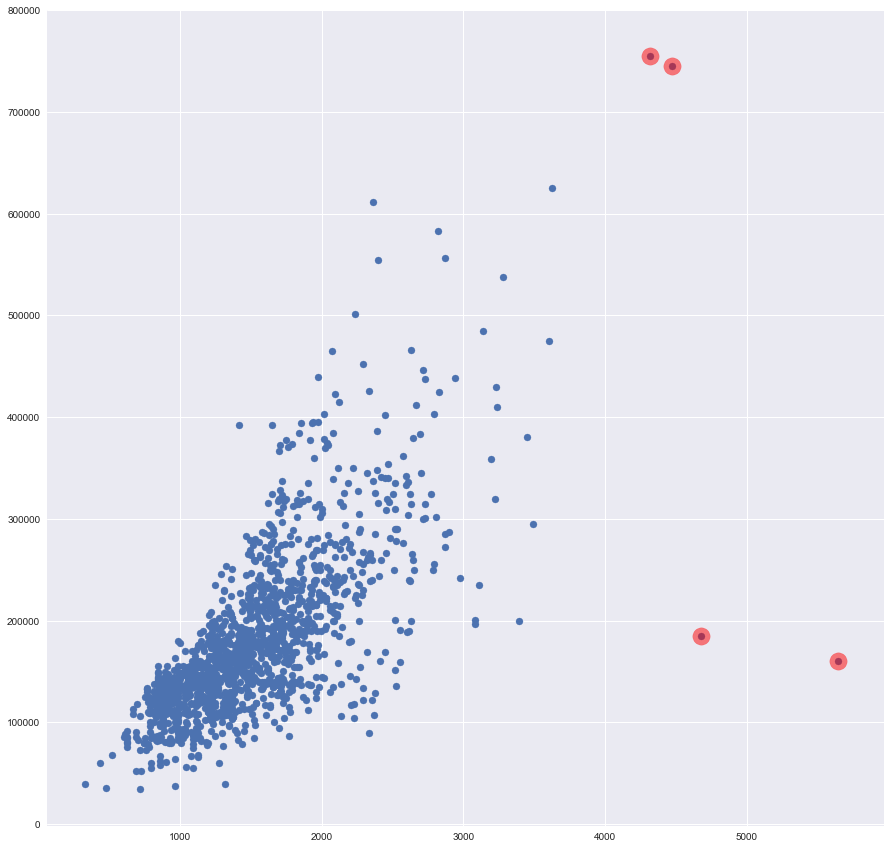

In [1239]:
plt.figure(figsize = (15,15))
plt.scatter(df["GrLivArea"],df["SalePrice"])
plt.scatter(df["GrLivArea"][df["GrLivArea"]>4000], df["SalePrice"][df["GrLivArea"]>4000], s=300, c="r", alpha=0.5)
plt.show()

In [1240]:
df = df[df["GrLivArea"]<4000]
df.shape

(1456, 81)

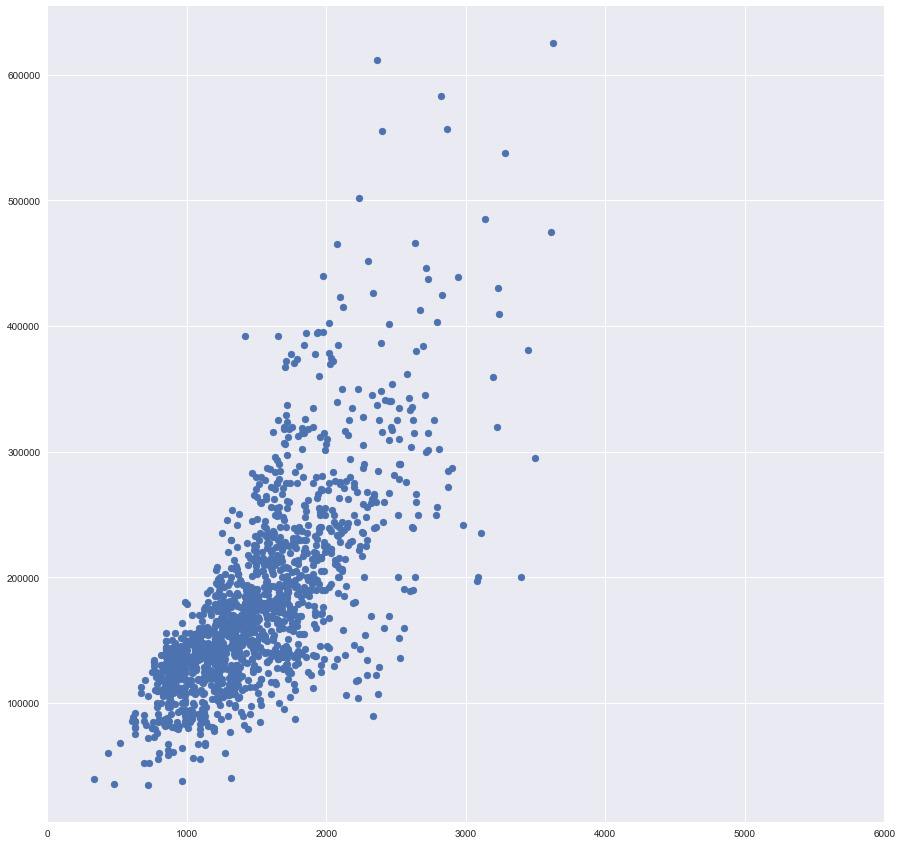

In [1241]:
plt.figure(figsize=(15,15))
plt.scatter(df["GrLivArea"],df["SalePrice"])
plt.xlim(0,6000)
plt.show()

### B. 더미변수화
- 더미변수화 하게 되면 모든 카테고리 레벨들이 변수가 되기 때문에 train_set, test_set 각각 존재하지 않는 데이터를 가질 수 가능성이 있다.
- train_set과 test_set을 합친 후 다시 나누게 되면 각 data set에 존재하지 않는 카테고리 변수는 0으로 채워지게 된다.
- sm.OLS.from_formula에서 scikit learn으로 변경한 이유 

In [1242]:
df_train_test = pd.concat([df[df.columns[:-1]], df_test])
df_train_test.shape

(2915, 80)

In [1243]:
nominal = df_train_test[nominal_col]
ordinal = df_train_test[ordinal_col]
discrete = df_train_test[discrete_col]
continuous = df_train_test[continous_col]

temp_nominal=pd.get_dummies(nominal)
temp_ordinal = pd.get_dummies(ordinal)
result = pd.concat([discrete, continuous, temp_nominal, temp_ordinal], axis=1)

In [1244]:
result.shape

(2915, 317)

### C. 다항회귀 적용
- 비선형 분포를 보이는 변수를 연속형 변수 중에서 찾는다

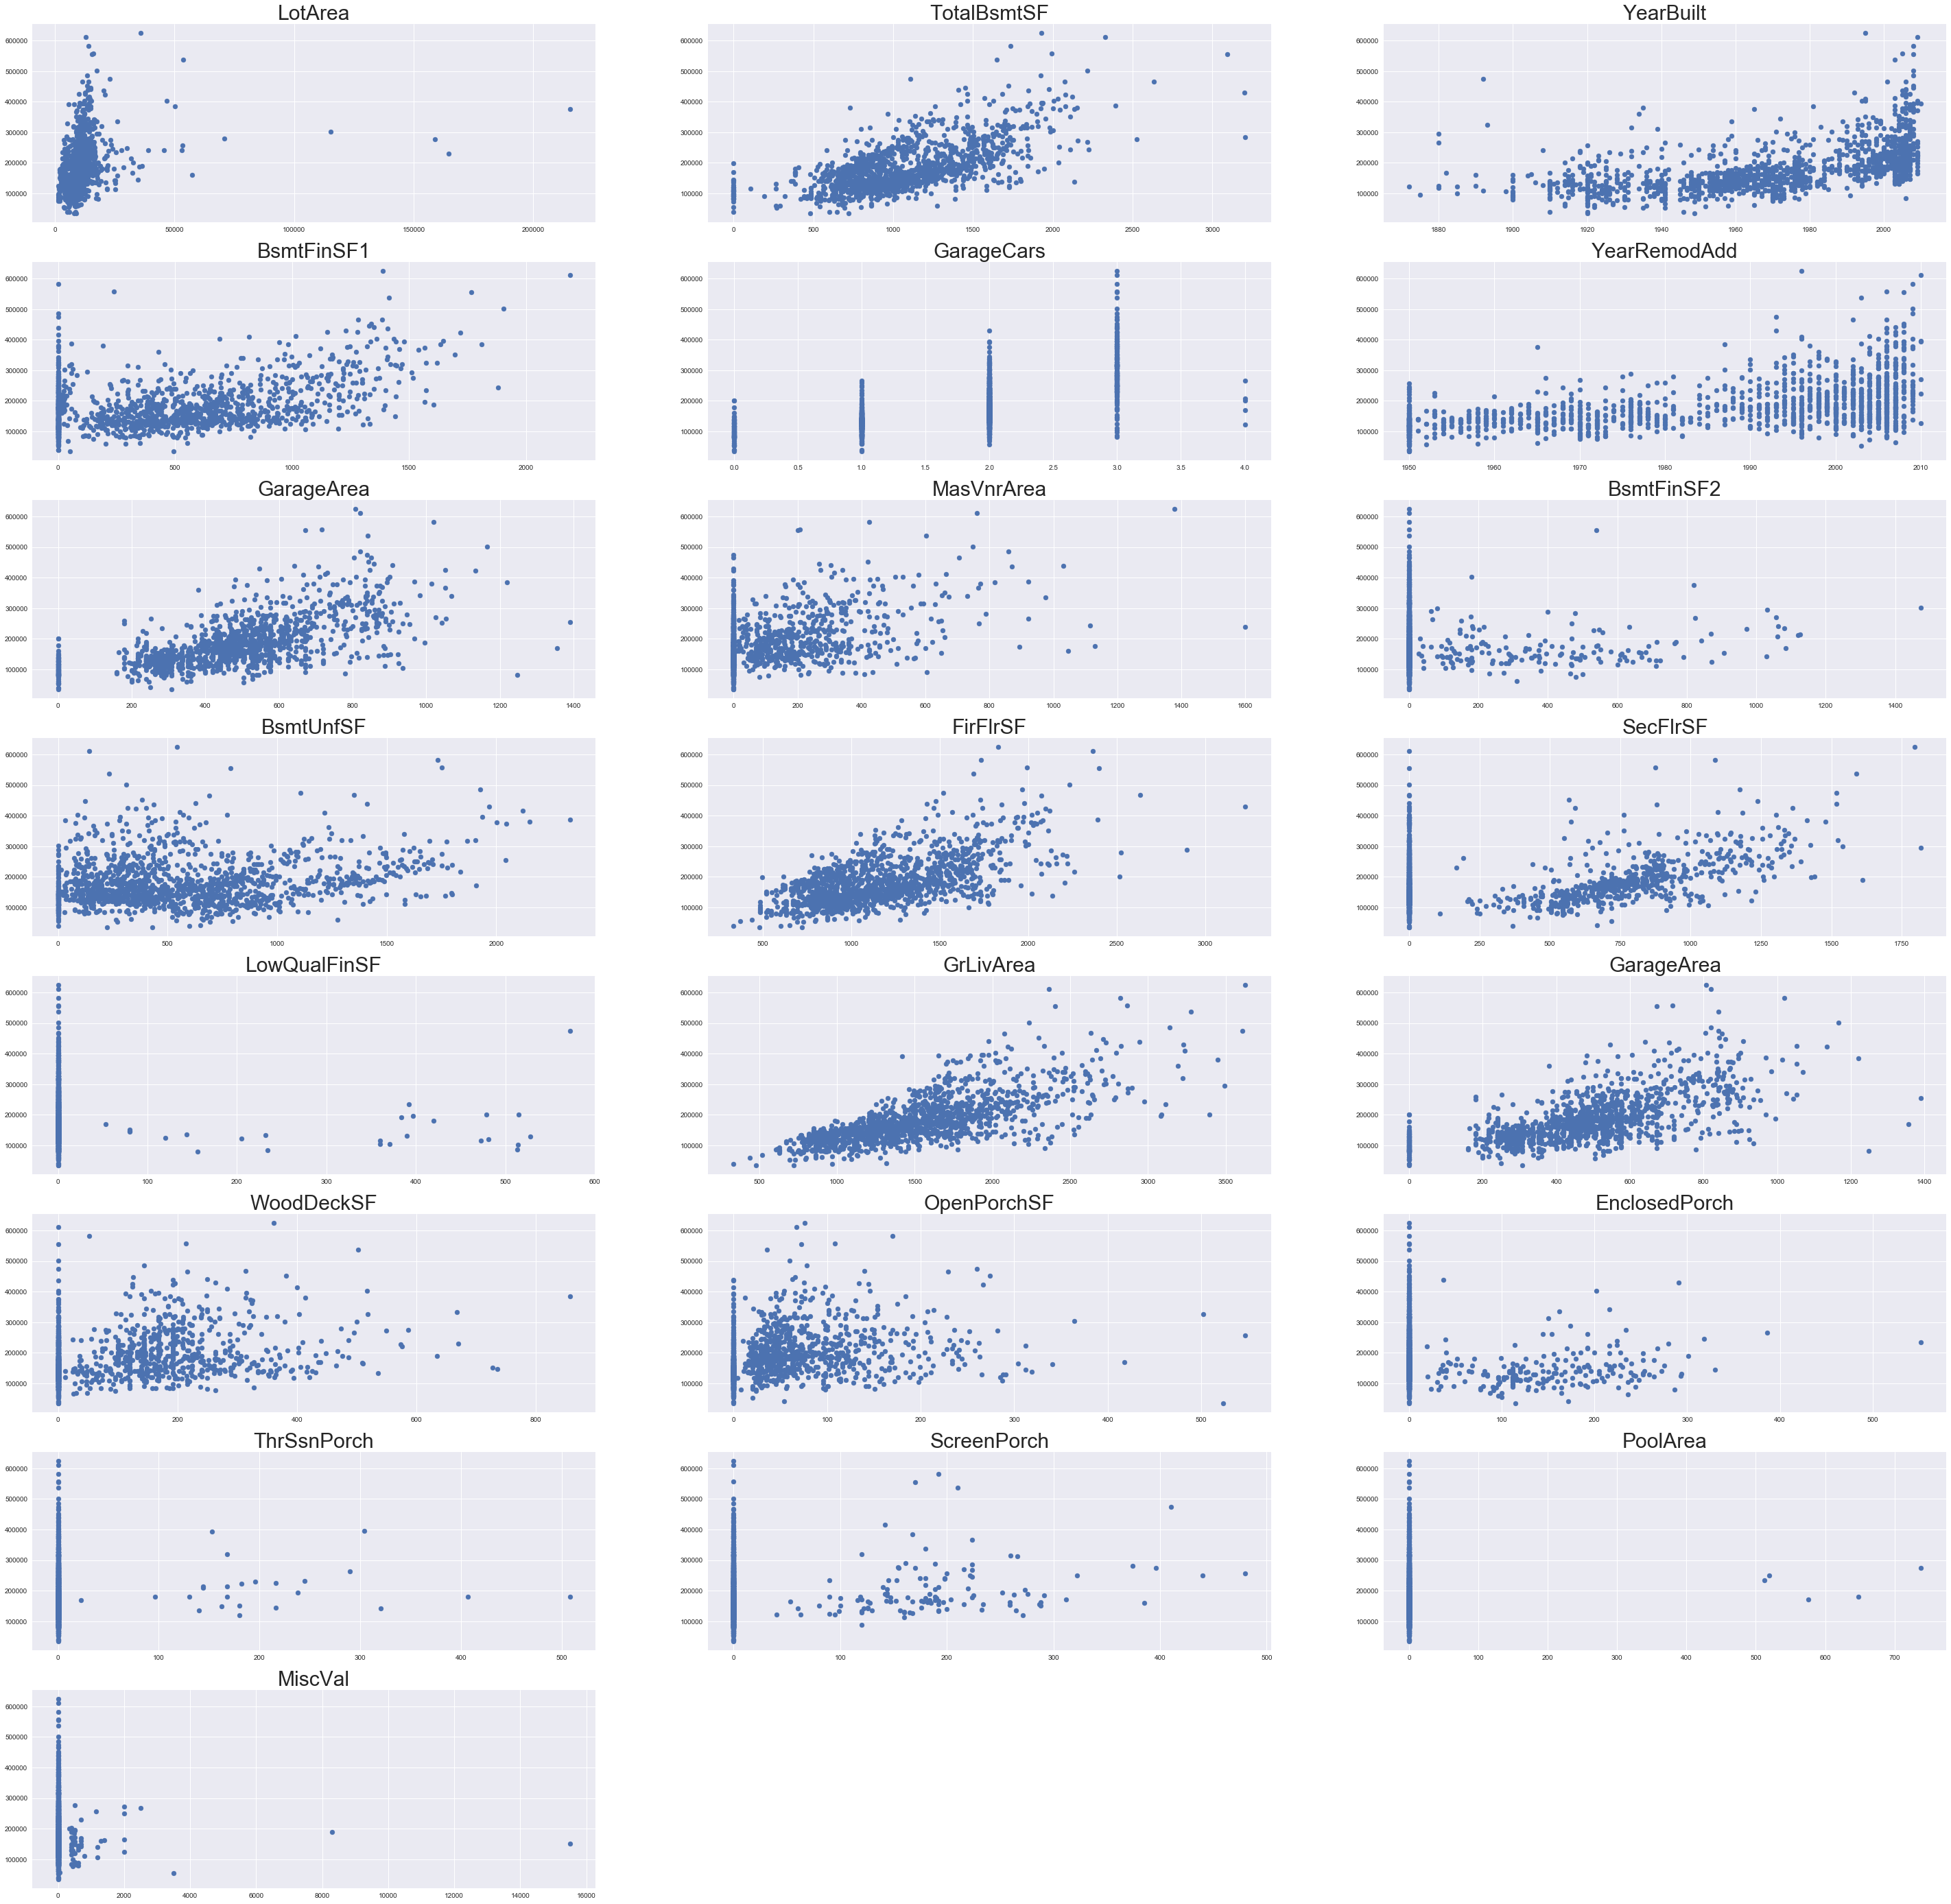

In [1245]:
cols_for_checking_nonlinear =['LotArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd', 'GarageArea',\
                              "MasVnrArea","BsmtFinSF2","BsmtUnfSF","FirFlrSF","SecFlrSF","LowQualFinSF",\
               "GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","ThrSsnPorch","ScreenPorch",\
                              "PoolArea","MiscVal"]
num = 1
plt.figure(figsize = (50,50))
for col in cols_for_checking_nonlinear:
    plt.subplot(8,3,num)
    plt.scatter(result[col][:1456],df["SalePrice"])
    plt.title(col,{'fontsize': '30'})
    num += 1
    
plt.show()

#non_linear_probably = ['LotArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd', 'GarageArea']


- 종속변수 SalePrice의 분산이 독립변수들이 커짐에 따라 증가하는 이분산성을 고려하여 비선형분포를 이루는 변수를 고른다.
- ['LotArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd', 'GarageArea', 'BsmtUnfSF', 'FirFlrSF']
- 테스트 데이터에 대한 성능을 기준으로 위 변수들의 분포가 비선형이라고 결정한다.

In [1246]:
non_linear_probably = ['LotArea', 'TotalBsmtSF', 'YearBuilt', 'BsmtFinSF1', 'GarageCars', 'YearRemodAdd',\
                       'GarageArea', 'BsmtUnfSF', 'FirFlrSF']

In [1247]:
poly_continous = []
for col in non_linear_probably:
    new_col = 'sqr_' + col
    poly_continous += [new_col]
    result[new_col] = result[col] ** 2
    new_col = 'triple_' + col
    poly_continous += [new_col]
    result[new_col] = result[col] ** 3

In [1248]:
poly_continous
result.shape

(2915, 335)

### C. Log Scaling
> skewed distribution

- skewed 되어잇는 시각화 보충

In [1249]:
skew = [ 'LotArea','OverallCond', 'YearBuilt', 'MasVnrArea',
      'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'FirFlrSF', 'SecFlrSF',
      'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath',
      'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ThrSsnPorch',
      'ScreenPorch', 'PoolArea', 'MiscVal', 'GrLivArea']

In [1250]:
df["LogSalePrice"] = df["SalePrice"].apply(lambda x: np.log(x))
df = df.drop("SalePrice",axis=1)

In [1251]:
for col in skew:
    result[col] = result[col].apply(np.log1p)
    result = result.rename(columns={col:str('Log'+col)})


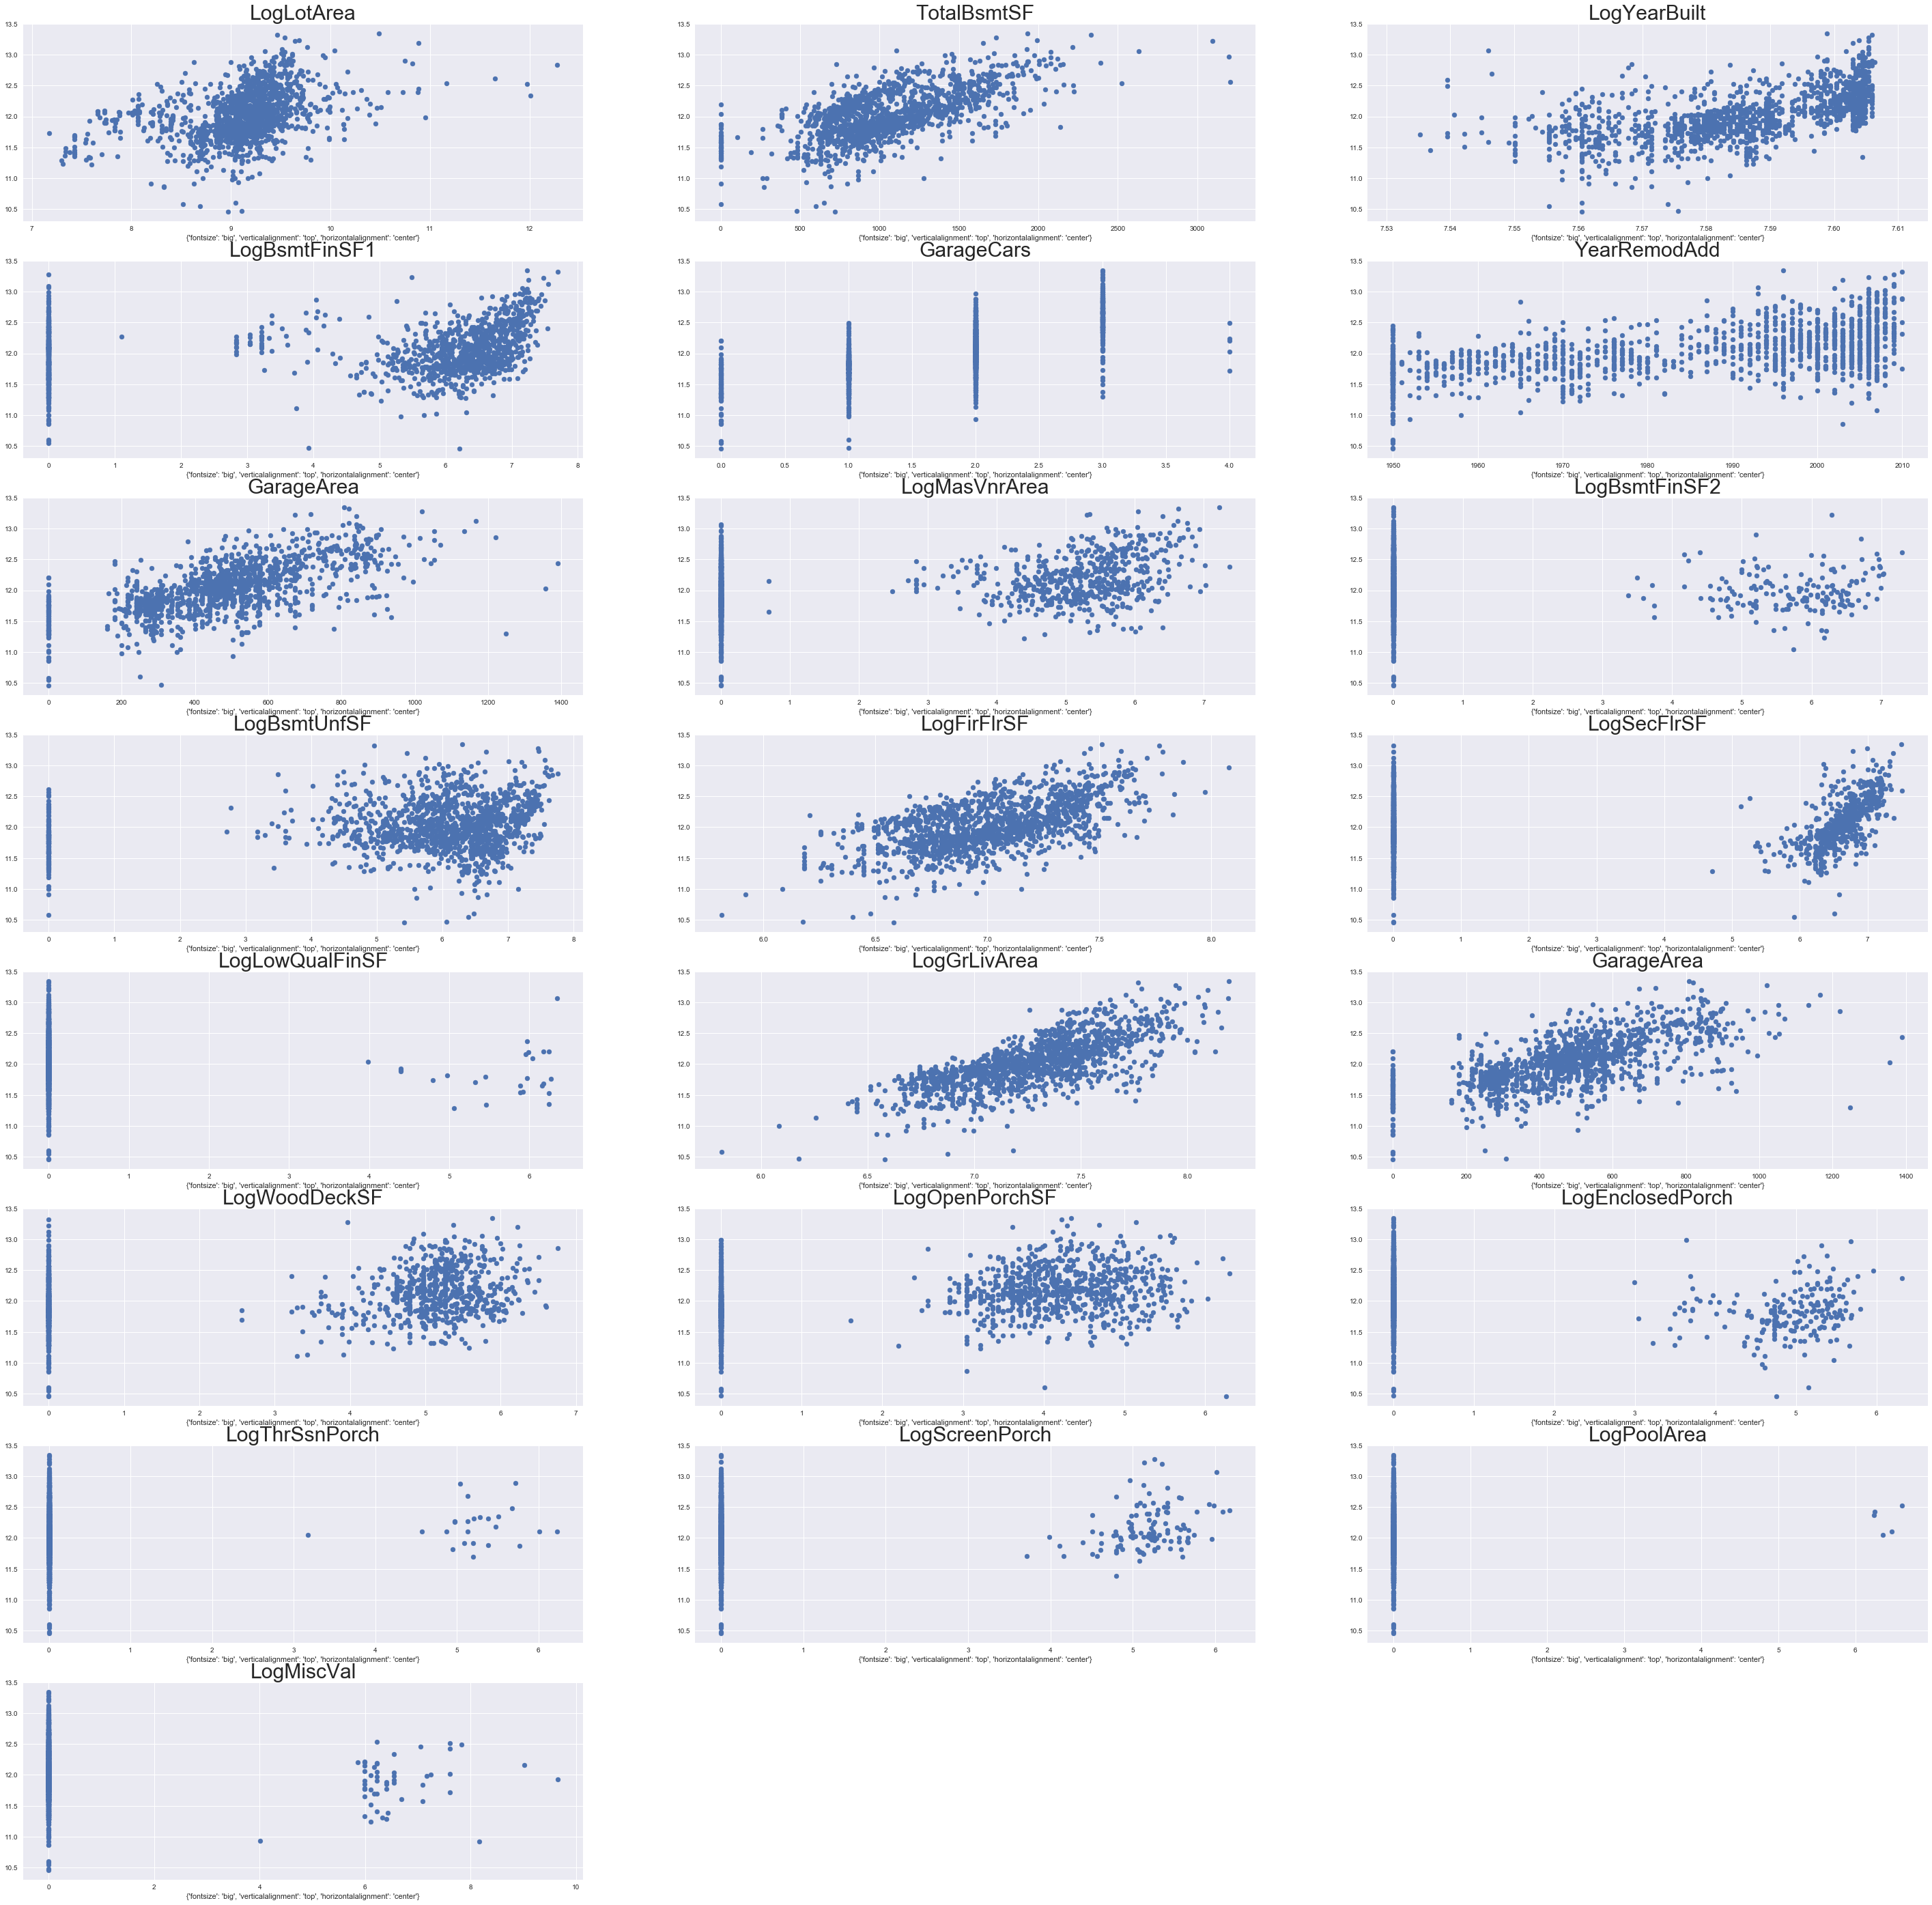

In [1252]:
log_cols_for_checking_nonlinear =['LogLotArea', 'TotalBsmtSF', 'LogYearBuilt', 'LogBsmtFinSF1', 'GarageCars',\
                                  'YearRemodAdd', 'GarageArea',"LogMasVnrArea","LogBsmtFinSF2","LogBsmtUnfSF","LogFirFlrSF","LogSecFlrSF",\
                                  "LogLowQualFinSF", "LogGrLivArea","GarageArea","LogWoodDeckSF","LogOpenPorchSF","LogEnclosedPorch","LogThrSsnPorch",\
                                  "LogScreenPorch","LogPoolArea","LogMiscVal"]
num = 1
plt.figure(figsize = (50,50))
for col in log_cols_for_checking_nonlinear:
    plt.subplot(8,3,num)
    plt.scatter(result[col][:1456],df["LogSalePrice"])
    plt.title(col,{'fontsize': '30'})
    plt.xlabel({
      'fontsize'            : 'big',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      })
    num += 1
    
plt.show()


- 종속변수 SalePrice의 분산이 독립변수들이 커짐에 따라 증가하는 이분산성이 줄어 들었음을 볼 수 있다.

## normal 하게 된 시각화 보충하기

### D. Outliers 파악 및 제거

# 배치 위치 고민 다시

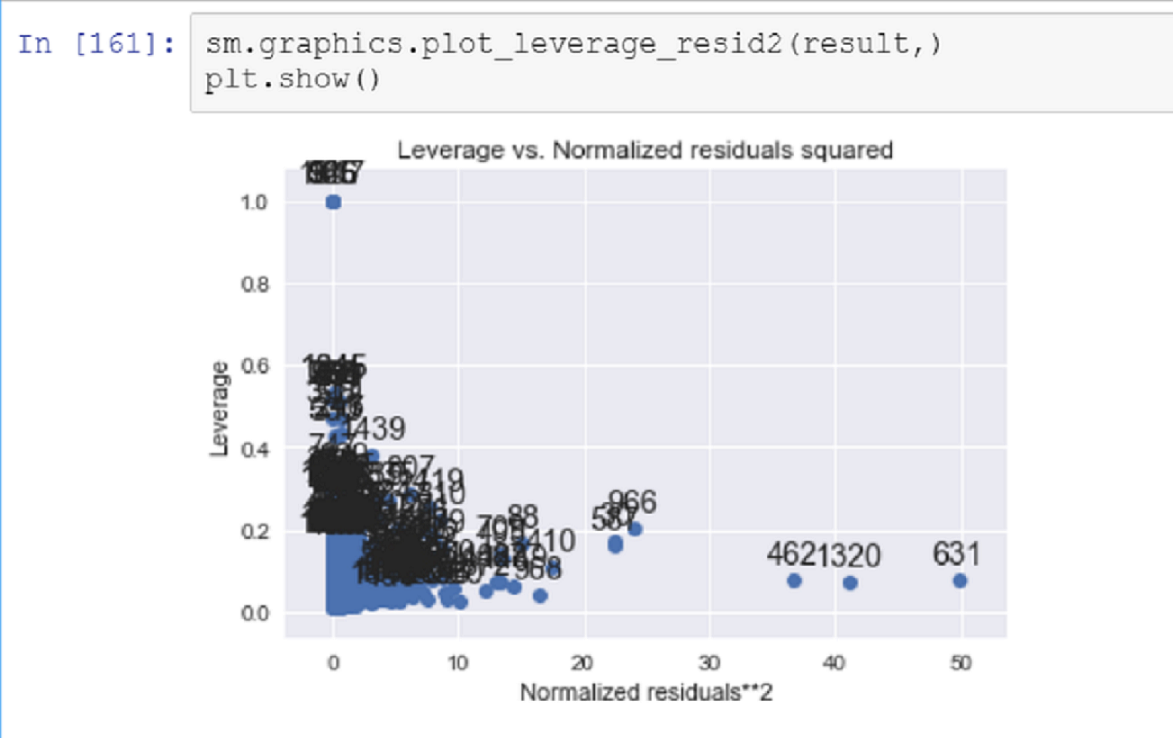

In [1253]:
from PIL import Image as pil
pil.open('outliers_deleted_based_on_CooksD.png')

In [1254]:
#outliers
result = result.reset_index(drop=True)

print(df.iloc[[462,1320,631],:])
result.iloc[[462,1320,631],:]


        Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
462    463         20       RL         60.0     8281   Pave  None      IR1   
1324  1325         20       RL         75.0     9986   Pave  None      Reg   
632    633         20       RL         85.0    11900   Pave  None      Reg   

     LandContour Utilities      ...      PoolArea  PoolQC Fence MiscFeature  \
462          Lvl    AllPub      ...             0  NoPool  GdWo        None   
1324         Lvl    AllPub      ...             0  NoPool  None        None   
632          Lvl    AllPub      ...             0  NoPool  None        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  LogSalePrice  
462        0     12   2009        WD         Normal     11.041048  
1324       0      2   2007       New        Partial     11.898188  
632        0      4   2009        WD         Family     11.320554  

[3 rows x 81 columns]


LogYearBuilt  YearRemodAdd  LogBsmtFullBath  LogBsmtHalfBath  FullBath  \
462       7.583756          1965              0.0              0.0         1   
1320      7.604396          2007              0.0              0.0         2   
631       7.589842          1977              0.0              0.0         2   

      LogHalfBath  BedroomAbvGr  LogKitchenAbvGr  LogTotRmsAbvGrd  \
462           0.0             3         0.693147         1.791759   
1320          0.0             2         0.693147         2.079442   
631           0.0             3         0.693147         1.945910   

      LogFireplaces       ...         sqr_GarageCars  triple_GarageCars  \
462        0.693147       ...                    1.0                1.0   
1320       0.693147       ...                    9.0               27.0   
631        0.693147       ...                    4.0                8.0   

      sqr_YearRemodAdd  triple_YearRemodAdd  sqr_GarageArea  \
462            3861225           7587307125        129600.0   
1320           4028049           8084294343        801025.0   
631            3908529           7727161833        295936.0   

      triple_GarageArea  sqr_BsmtUnfSF  triple_BsmtUnfSF  sqr_FirFlrSF  \
462          46656000.0            0.0      0.000000e+00        746496   
1320        716917375.0      3222025.0      5.783535e+09       3222025   
631         160989184.0       318096.0      1.794061e+08       1990921   

      triple_FirFlrSF  
462         644972544  
1320       5783534875  
631        2809189531  

[3 rows x 335 columns]

In [1255]:
len(df), len(df_test), len(result)

(1456, 1459, 2915)

In [1256]:
#resid_pearson
df = df.drop(462, axis=0)
# len(result)
df = df.drop(1320, axis=0)
# len(result)
df = df.drop(631, axis=0)
len(df)

1453

In [1257]:
#resid_pearson
result = result.drop(462, axis=0)
len(result)
result = result.drop(1320, axis=0)
len(result)
result = result.drop(631, axis=0)
len(result)

2912

In [1258]:
len(df), len(df_test), len(result)

(1453, 1459, 2912)

- train DF 와 test DF를 데이터 숫자에 맞게 다시 나눈다.

In [1259]:
df_train = result[:1453]
df_test = result[1453:]

In [1260]:
y = df['LogSalePrice'].values
len(y)

1453

### E. RobustScaler
- median, interquartile range 사용. outlier 영향 최소화하는 스케일러이다.
- 표준 스케일러인 standardscaler와 비교하여 test 성능 월등히 높다.
- standardscaler는 outlier에 대한 영향을 억제하지 못한다. 
- 이는 본 데이터 셋이 outlier의 영향을 많이 받고 있었다는 의미로 해석된다.

In [1261]:
from sklearn.preprocessing import RobustScaler
scalar_fit = RobustScaler().fit(result)
X_train = scalar_fit.transform(df_train)
X_test = scalar_fit.transform(df_test)

# 4.Modeling 

- sm.OLS
- Lasso

### A. sm.OLS Modeling

### B-1. Lasso Modeling

In [1262]:
from sklearn.linear_model import LassoCV,Lasso
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

In [1263]:
# df_test의 데이터 개수 검사 - 앞의 전처리 과정에서 오류 검정
df.head()
len(df_test)

1459

In [1264]:
# 정의한 rmse_cv 함수에 y를 정의 
y = df['LogSalePrice'].values
len(y)

1453

### cross_val_score 활용
cross_val_score(estimator, X, y=None, scoring=None, cv=None)
cross validation iterator cv를 이용하여 X, y data 를 분할하고 estimator에 넣어서 scoring metric을 구하는 과정을 반복한다.

출처 : https://datascienceschool.net/view-notebook/266d699d748847b3a3aa7b9805b846ae/

### sklearn-Lasso 활용
Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)
출처 : http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [1265]:
num_alphas = 100
alphas= np.linspace(-7,7, num_alphas)

cv_lasso = [rmse_cv(Lasso(alpha = 10**i)).mean() 
            for i in alphas]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

### Regularization parameter('$\lambda$')에 대한 RMSE Plot

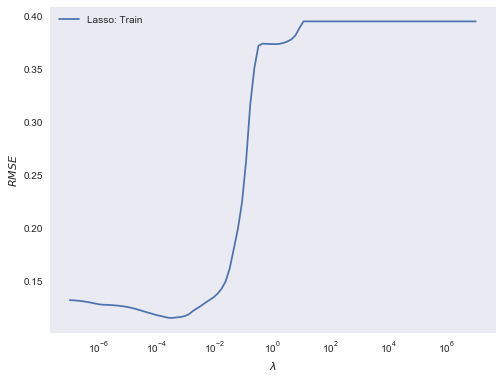

min RMSE on training set 0.115429239017


In [1266]:

plt.figure(figsize=(8, 6))
plt.semilogx(10.0**alphas, (cv_lasso), label='Lasso: Train')

plt.xlabel('$\lambda$')
plt.ylabel(r'$RMSE$')

plt.grid()
plt.legend(loc = 'best')

plt.show()
print('min RMSE on training set', min(cv_lasso))

In [1267]:
min_lasso = min(cv_lasso)
min_index = cv_lasso.index(min_lasso)


### 최적정규화 하는 $ \lambda $를 세분화하여 한번 더 최적화한다. 


In [1042]:
best_alpha = alphas[min_index]
num_alphas = 100
alphas = np.linspace(best_alpha -0.3 , best_alpha + 0.3, num_alphas)

cv_lasso = [rmse_cv(Lasso(alpha = 10**i)).mean() 
            for i in alphas]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


### Regularization parameter('$\lambda$')에 대한 RMSE Plot2

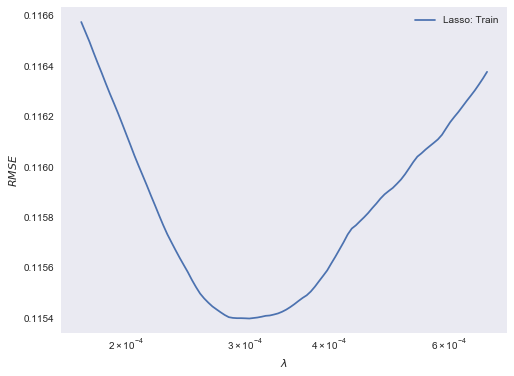

min RMSE on training set 0.115398491325


In [1043]:
plt.figure(figsize=(8, 6))
plt.semilogx(10.0**alphas, (cv_lasso), label='Lasso: Train')

plt.xlabel('$\lambda$')
plt.ylabel(r'$RMSE$')

plt.grid()
plt.legend(loc = 'best')

plt.show()
print('min RMSE on training set', min(cv_lasso))

In [1044]:
min_lasso = min(cv_lasso)
min_index = cv_lasso.index(min_lasso)

In [1074]:
min_value #0.11462404867318146

0.11542949824967633

### 최적 parameter 찾은 후 Lasso Model에 적용

In [1268]:
lasso_model = Lasso(alpha = 10**(alphas[min_index]))
lasso_model.fit(X_train, y)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.00034304692863149159, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [1270]:
y_pred = lasso_model.predict(X_test)
y_pred_hahahahaha = np.exp(y_pred)
result_predict = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': y_pred_hahahahaha})
result_predict.to_csv('LASSO12.csv', header=True,  index = False)


### B-2. Lasso Modeling
 ### - testing the normality of residual distribution 

In [1050]:
y_train_pred = lasso_model.predict(X_train)
len(y_train_pred)


1453

####  Residual Distribution

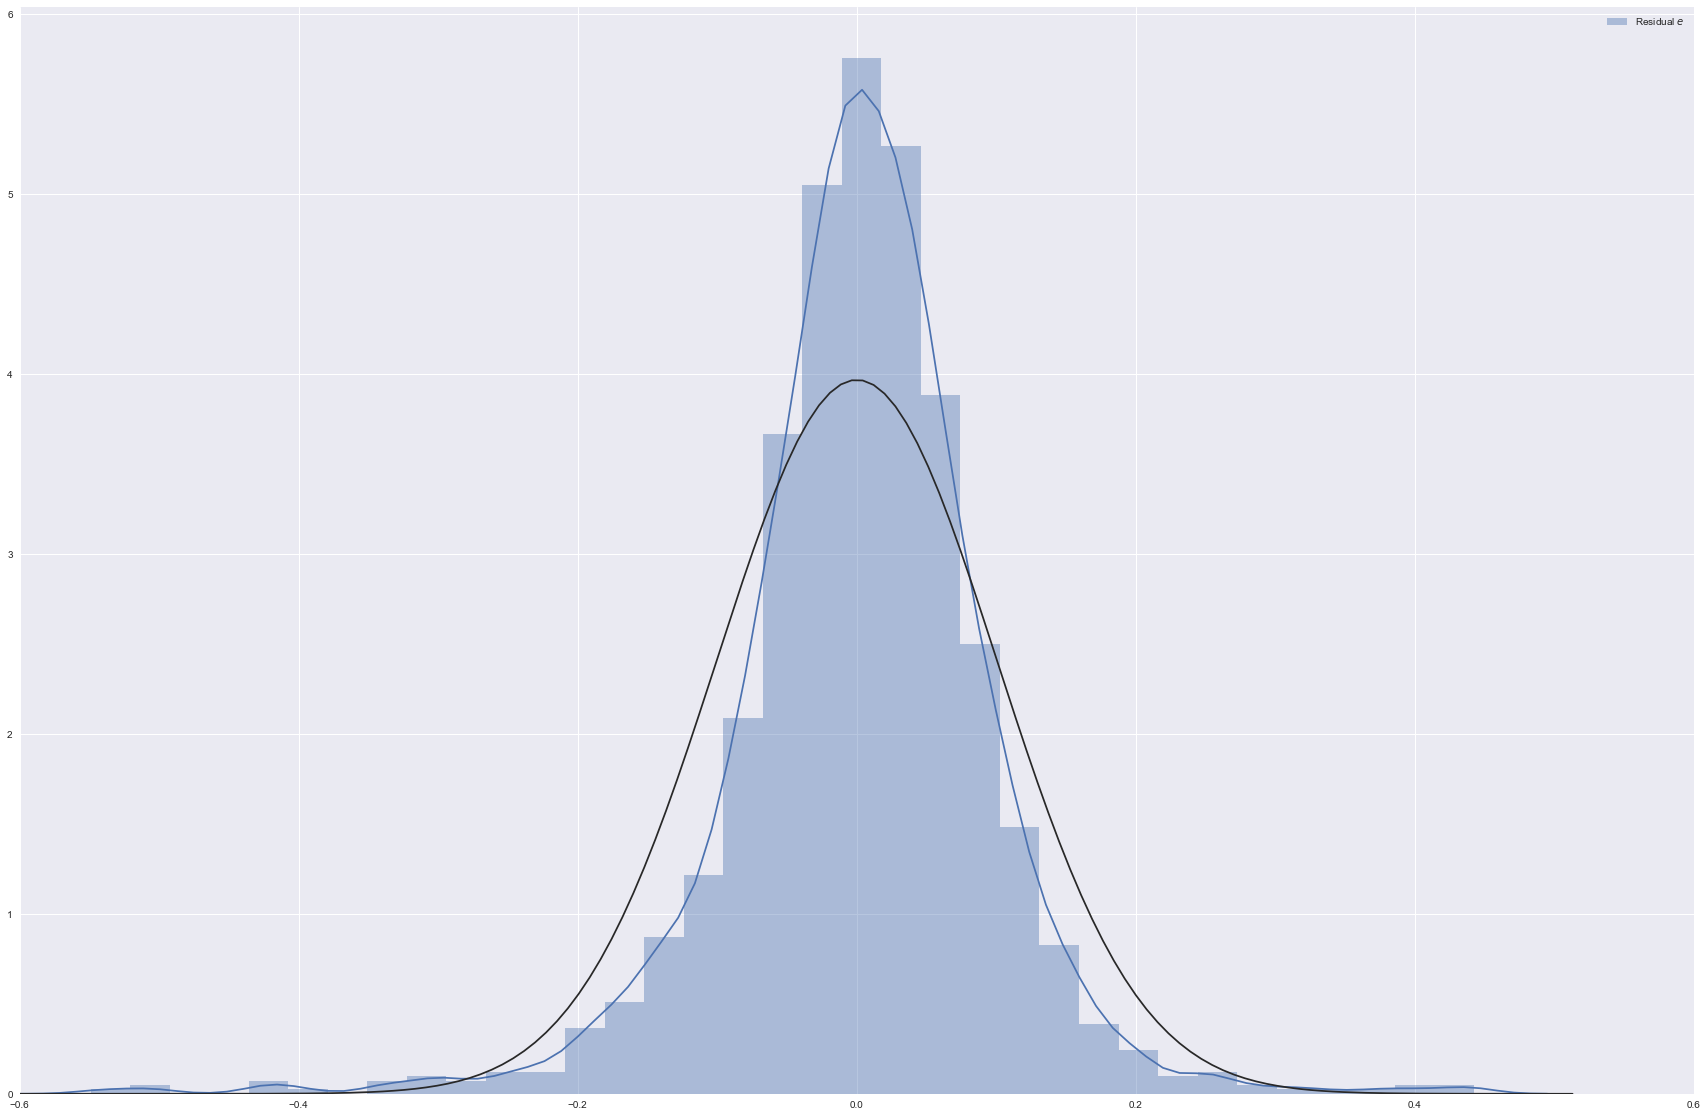

In [1051]:
import scipy as sp
plt.figure(figsize = (30,20))
train_residual = y - y_train_pred
sns.distplot(train_residual, kde=True, fit=sp.stats.norm, label="Residual $ e $")
plt.xlim(-0.6,0.6)
plt.legend()
plt.show()

- 잔차가 0을 중심으로 분포하고 있다.
- 잔차의 분포는 표준정규분포와 다른 분포를 가진 것으로 보인다.
- 잔차의 분포는 long-tailed 혹은 fat_tailed 된 점으로 보아 T 분포와 유사하다.
- 정규성 검정의 필요성이 있다.

#### QQ Plot

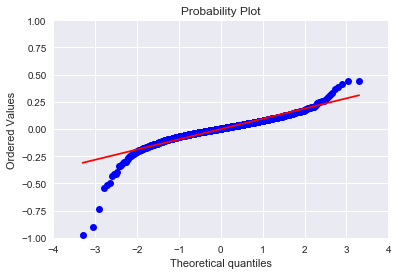

In [1052]:
sp.stats.probplot(train_residual, plot=plt)
plt.xlim(-4,4)
plt.ylim(-1.0,1.0)

plt.show()

- QQ플롯은 잔차의 분포가 정규분포가 아님을 보인다.

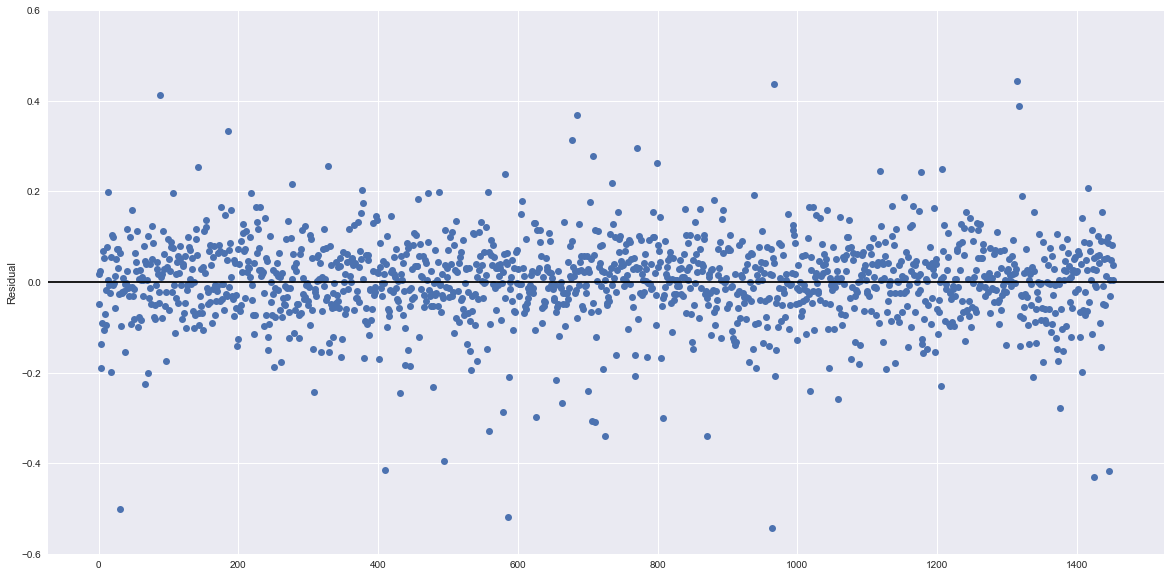

In [1053]:
plt.figure(figsize=(20,10))
plt.plot(train_residual, 'o')
plt.axhline(y=0, c='k')
plt.ylabel("Residual")
plt.ylim(-0.6,0.6)
plt.show()

#### Normality Test

In [1054]:
sp.stats.jarque_bera(train_residual)

(14140.258556249279, 0.0)

- 잔차의 분포, 잔차의 패턴, 잔차의 정규성 검정을 보면 잔차의 분포는 정규분포가 아님을 알 수 있다.
- 오히려 잔차의 분포는 T 분포로 보인다. 
- 이론적으로, 잔차는 오차의 선형조합이라 정규분포이어야 한다. 하지만 주어진 데이터가 다변수 확률모형에서 나온 유한한 샘플이라는 점을 고려하면 잔차의 분포는 t분포를 따르는 것으로 보인다.

#### T분포와 Residual Distribution

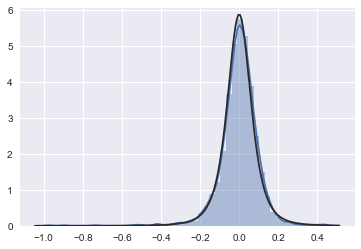

In [1073]:
np.random.seed(0)
N = 100
x = sp.stats.t(1000).rvs(N)
sns.distplot(train_residual, fit=sp.stats.t)
plt.show()
# sp.stats.ks_2samp(x, train_residual)

### B-3. 라소모델 상관계수

In [1056]:
len(lasso_model.coef_), len(result.columns)
# [best_lasso.coef_!=0]
best_lasso_cols = result.columns[lasso_model.coef_!=0]
best_lasso_cols_coef = lasso_model.coef_[lasso_model.coef_!=0]
Best_model_result = pd.DataFrame({"Selected_columns":best_lasso_cols,"Coefficient":best_lasso_cols_coef })
sel_coef = Best_model_result["Coefficient"]
Best_model_result = Best_model_result.drop("Coefficient", axis=1)
Best_model_result["Coefficient"] = sel_coef
# Best_model_result = Best_model_result.sort_values(by="Coefficient",ascending = False,)
# Best_model_result["Selected_columns"].values
Best_model_result

Selected_columns  Coefficient
0               LogYearBuilt     0.009019
1               YearRemodAdd     0.027754
2            LogBsmtFullBath     0.017643
3                   FullBath     0.029897
4                LogHalfBath     0.024226
5               BedroomAbvGr    -0.004739
6            LogKitchenAbvGr    -0.052062
7            LogTotRmsAbvGrd     0.003902
8              LogFireplaces     0.017616
9             LogGarageYrBlt     0.000121
10                    YrSold    -0.005204
11               LotFrontage    -0.001913
12                LogLotArea     0.038748
13             LogMasVnrArea     0.007958
14             LogBsmtFinSF1     0.055318
15             LogBsmtFinSF2    -0.001134
16              LogBsmtUnfSF    -0.005928
17               TotalBsmtSF     0.048471
18               LogFirFlrSF     0.028439
19           LogLowQualFinSF    -0.003044
20              LogGrLivArea     0.156196
21             LogWoodDeckSF     0.016654
22            LogOpenPorchSF     0.003309
23          LogEnclosedPorch     0.003699
24            LogThrSsnPorch     0.001463
25            LogScreenPorch     0.006211
26               LogPoolArea     0.015402
27                LogMiscVal    -0.002804
28             MSSubClass_30    -0.026826
29             MSSubClass_70     0.009480
..                       ...          ...
123         Electrical_SBrkr    -0.001194
124           KitchenQual_Ex     0.058096
125           KitchenQual_TA    -0.006236
126          Functional_Maj2    -0.061815
127          Functional_Min2     0.000595
128           Functional_Mod    -0.008256
129           Functional_Typ     0.068708
130           FireplaceQu_Fa    -0.006446
131  FireplaceQu_NoFirePlace    -0.006305
132           FireplaceQu_Po     0.005418
133         GarageFinish_Fin     0.004520
134         GarageFinish_RFn    -0.000412
135            GarageQual_Ex     0.045205
136            GarageQual_Fa    -0.014340
137            GarageQual_Gd     0.020848
138            GarageQual_TA    -0.000806
139            GarageCond_Fa    -0.019383
140             PavedDrive_Y     0.019528
141               Fence_GdWo    -0.003126
142              sqr_LotArea    -0.000581
143           triple_LotArea     0.000053
144            sqr_YearBuilt     0.053581
145         triple_YearBuilt     0.014252
146        triple_BsmtFinSF1     0.006630
147        triple_GarageCars     0.018680
148           sqr_GarageArea     0.023249
149        triple_GarageArea    -0.008571
150            sqr_BsmtUnfSF    -0.000122
151         triple_BsmtUnfSF     0.000945
152             sqr_FirFlrSF    -0.014037

[153 rows x 2 columns]

# 5 -1. 성능 평가  - sm.OLS

# 5 -2. 성능 평가  - Lasso Model

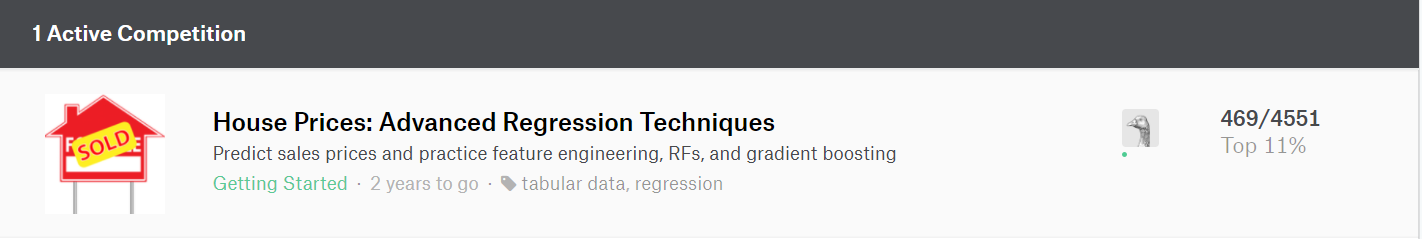

In [1296]:
pil.open('Record1.png')

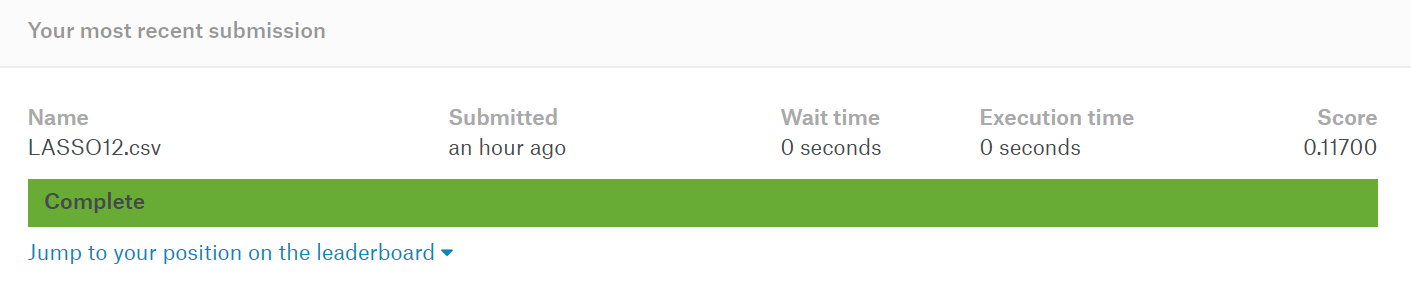

In [1297]:
pil.open('Record2.png')

# 앞으로 고민해야 할 부분

In [855]:
result.shape

(2912, 335)

In [916]:
resultDF_index = list(result.columns)
resultDF_index.insert(0,'Intercept')

\begin{eqnarray}
\text{Cov}[\hat{w}] 
&=& \sigma^2  (X^TX)^{-1}
\end{eqnarray} 

$$ s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K} $$ 

In [1289]:
params = np.append(lasso_model.intercept_,lasso_model.coef_)

newX = X_train

newX = sm.add_constant(newX)

S_2 = (sum((train_residual)**2))/(len(newX)-newX.shape[1])

# singular_Matrix는 역행렬이 없어서 (X.T*X)^-1 이 실행안되는 문제 발생한다.
## np.linalg.svd()를 이용하여 역행렬을 근사하게 구한다.
singular_Matrix = np.dot(newX.T,newX)

u,s,v=np.linalg.svd(singular_Matrix)
singular_Matrix_inv=np.dot(v.transpose(),np.dot(np.diag(s**-1),u.transpose()))


$$ \text{Est.Cov}[\hat{w}]  = s^2(X^TX)^{-1} $$ 
$$ \text{Est.Var}[\hat{w}_i]  = \left( \text{Est.Cov}[\hat{w}] \right)_{ii} \;\; (i=0, \ldots, K-1) $$ 

In [1290]:
Cov_Var = S_2*(singular_Matrix_inv.diagonal())

std_e = np.sqrt(Cov_Var)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


t_statistics과 p_value를 구하고 resultDF에 데이터프레임화 한다.

In [1291]:
t_stat = params/ std_e

p_values =[2*(1-sp.stats.t.cdf(np.abs(i),(len(newX)-1))) for i in t_stat]

std_e = np.round(std_e,3)
t_stat = np.round(t_stat,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

# # # Cov_Var, std_e
resultDF = pd.DataFrame()
resultDF["Coefficients"],resultDF["Standard Errors"],resultDF["t values"],resultDF["Probabilites"] =\
[params,std_e,t_stat, p_values]
resultDF.index = resultDF_index
filter_resultDF = resultDF["Coefficients"] != 0
resultDF = resultDF[filter_resultDF]
resultDF

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


Coefficients  Standard Errors  t values  Probabilites
Intercept                     12.0060              NaN       NaN           NaN
LogYearBuilt                   0.0073           34.908     0.000         1.000
YearRemodAdd                   0.0272          484.000     0.000         1.000
LogBsmtFullBath                0.0174            0.011     1.655         0.098
FullBath                       0.0293            0.011     2.552         0.011
LogHalfBath                    0.0239            0.011     2.110         0.035
BedroomAbvGr                  -0.0045            0.007    -0.613         0.540
LogKitchenAbvGr               -0.0447            0.078    -0.570         0.568
LogTotRmsAbvGrd                0.0034            0.011     0.317         0.751
LogFireplaces                  0.0176            0.023     0.750         0.454
LogGarageYrBlt                 0.0001            0.015     0.008         0.994
YrSold                        -0.0052            0.005    -0.974         0.330
LotFrontage                   -0.0018            0.004    -0.427         0.669
LogLotArea                     0.0387            0.007     5.402         0.000
LogMasVnrArea                  0.0075            0.031     0.238         0.812
LogBsmtFinSF1                  0.0549            0.071     0.769         0.442
LogBsmtFinSF2                 -0.0012            0.022    -0.056         0.955
LogBsmtUnfSF                  -0.0059            0.005    -1.117         0.264
TotalBsmtSF                    0.0485            0.080     0.606         0.545
LogFirFlrSF                    0.0277            0.040     0.688         0.492
LogLowQualFinSF               -0.0025            0.007    -0.348         0.728
LogGrLivArea                   0.1563            0.028     5.597         0.000
LogWoodDeckSF                  0.0167            0.008     2.154         0.031
LogOpenPorchSF                 0.0032            0.008     0.375         0.708
LogEnclosedPorch               0.0036            0.002     1.522         0.128
LogThrSsnPorch                 0.0013            0.005     0.247         0.805
LogScreenPorch                 0.0062            0.003     2.485         0.013
LogPoolArea                    0.0149            0.796     0.019         0.985
LogMiscVal                    -0.0029            0.016    -0.183         0.855
MSSubClass_30                 -0.0261              NaN       NaN           NaN
...                               ...              ...       ...           ...
BsmtFinType2_Rec              -0.0127          111.387    -0.000         1.000
HeatingQC_Ex                   0.0240          109.558     0.000         1.000
HeatingQC_Gd                   0.0043          109.558     0.000         1.000
HeatingQC_TA                  -0.0013          109.558    -0.000         1.000
KitchenQual_Ex                 0.0576              NaN       NaN           NaN
KitchenQual_TA                -0.0067              NaN       NaN           NaN
Functional_Maj2               -0.0469           93.385    -0.001         1.000
Functional_Min2                0.0005           93.385     0.000         1.000
Functional_Mod                -0.0025           93.385    -0.000         1.000
Functional_Typ                 0.0696           93.385     0.001         0.999
FireplaceQu_Fa                -0.0039          192.214    -0.000         1.000
FireplaceQu_NoFirePlace       -0.0064          192.214    -0.000         1.000
FireplaceQu_Po                 0.0020          192.214     0.000         1.000
GarageFinish_Fin               0.0047              NaN       NaN           NaN
GarageQual_Ex                  0.0273              NaN       NaN           NaN
GarageQual_Fa                 -0.0138              NaN       NaN           NaN
GarageQual_Gd                  0.0175              NaN       NaN           NaN
GarageCond_Fa                 -0.0157          226.360    -0.000         1.000
PavedDrive_Y                   0.0194              NaN       NaN           